In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apdist import AmplitudePhaseDistance
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import Rbf, interp1d
from scipy import integrate
import numpy as np
import os
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.signal import find_peaks

pyplot_style ={"text.usetex": True,
               "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
               "axes.spines.right" : False,
               "axes.spines.top" : False,
               "font.size": 22,
               "savefig.dpi": 600,
               "savefig.bbox": 'tight'
              } 

## Load Data

In [2]:
def load_data(path, blank_path):
    y = pd.read_excel(path).values
    blank = pd.read_excel(blank_path).values[:,1]
    q = y[:,0]
    y = y - blank.reshape(-1,1)
    y = np.delete(y, 0, axis = 1)
    scaler = MinMaxScaler()
    y0 = scaler.fit(y).transform(y)
    return y0

In [3]:
path_0 = '../Fast Spectroscopic Exploration/Spectra/Spectra_0.xlsx'
path_1 = '../Fast Spectroscopic Exploration/Spectra/Spectra_1.xlsx'
path_2 = '../Fast Spectroscopic Exploration/Spectra/Spectra_2.xlsx'
path_3 = '../Fast Spectroscopic Exploration/Spectra/Spectra_3.xlsx'
path_4 = '../Fast Spectroscopic Exploration/Spectra/Spectra_4.xlsx'
path_5 = '../Fast Spectroscopic Exploration/Spectra/Spectra_5.xlsx'
blank_path = '../Fast Spectroscopic Exploration/Spectra/blank.xlsx'
y0 = load_data(path_0, blank_path)
y1 = load_data(path_1, blank_path)
y2 = load_data(path_2, blank_path)
y3 = load_data(path_3, blank_path)
y4 = load_data(path_4, blank_path)
y5 = load_data(path_5, blank_path)

In [4]:
y = np.hstack((y0, y1, y2, y3, y4, y5))

## Define Targets

In [5]:
df = pd.read_excel('../Fast Spectroscopic Exploration/Spectra/Simulations/plate_7nm_thickness.xlsx')
targets = df.values
wavelength = targets[:,0]
targets = np.delete(targets, 0, axis=1)

In [6]:
df2 = pd.read_excel('../Fast Spectroscopic Exploration/Spectra/Simulations/spheres.xlsx')
targets2 = df2.values
wv_s = targets2[:,0]
spheres = np.delete(targets2, 0, axis=1)
sphere_1 = spheres[:,0]
sphere_2 = spheres[:,1]
sphere_3 = spheres[:,2]
sphere_4 = spheres[:,3]
scaler = MinMaxScaler()
targets = scaler.fit(targets).transform(targets)

In [7]:
wv = np.linspace(350, 800, 91)
interp_func = interp1d(wavelength, targets[:,0])
target_1 = interp_func(wv).reshape(-1,1)
target_1 = scaler.fit(target_1).transform(target_1)
interp_func = interp1d(wavelength, targets[:,1])
target_2 = interp_func(wv).reshape(-1,1)
target_2 = scaler.fit(target_2).transform(target_2)
interp_func = interp1d(wavelength, targets[:,2])
target_3 = interp_func(wv).reshape(-1,1)
target_3 = scaler.fit(target_3).transform(target_3)
interp_func = interp1d(wavelength, sphere_1.flatten())
sphere_1 = interp_func(wv).reshape(-1,1)
sphere_1 = scaler.fit(sphere_1).transform(sphere_1)
interp_func = interp1d(wavelength, sphere_2.flatten())
sphere_2 = interp_func(wv).reshape(-1,1)
sphere_2 = scaler.fit(sphere_2).transform(sphere_2)
interp_func = interp1d(wavelength, sphere_3.flatten())
sphere_3 = interp_func(wv).reshape(-1,1)
sphere_3 = scaler.fit(sphere_3).transform(sphere_3)
interp_func = interp1d(wavelength, sphere_4.flatten())
sphere_4 = interp_func(wv).reshape(-1,1)
sphere_4 = scaler.fit(sphere_4).transform(sphere_4)

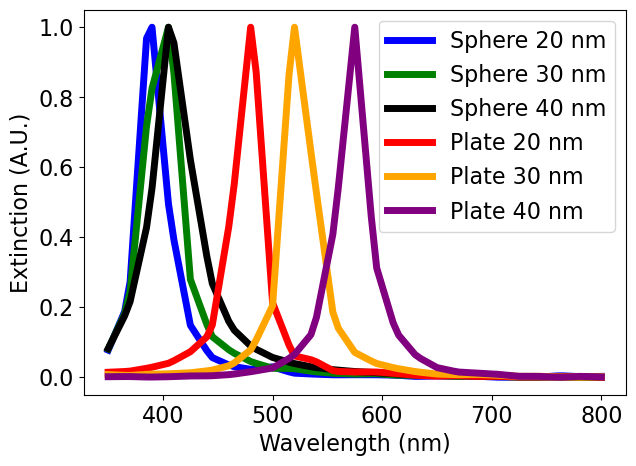

In [8]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(7,5))
# plt.plot(wv, sphere_1, label = 'Sphere 20 nm', linewidth = 5, color = 'deepskyblue')
# plt.plot(wv, sphere_2, label = 'Sphere 30 nm', linewidth = 5, color = 'blue')
# plt.plot(wv, sphere_4, label = 'Sphere 40 nm', linewidth = 5, color = 'darkblue')
# plt.plot(wv, target_1, label = 'Plate 20 nm', linewidth = 5, color = 'springgreen')
# plt.plot(wv, target_2, label = 'Plate 30 nm', linewidth = 5, color = 'forestgreen')
# plt.plot(wv, target_3, label = 'Plate 40 nm', linewidth = 5, color = 'darkgreen')

plt.plot(wv, sphere_1, label = 'Sphere 20 nm', linewidth = 5, color = 'blue')
plt.plot(wv, sphere_2, label = 'Sphere 30 nm', linewidth = 5, color = 'green')
plt.plot(wv, sphere_4, label = 'Sphere 40 nm', linewidth = 5, color = 'black')
plt.plot(wv, target_1, label = 'Plate 20 nm', linewidth = 5, color = 'red')
plt.plot(wv, target_2, label = 'Plate 30 nm', linewidth = 5, color = 'orange')
plt.plot(wv, target_3, label = 'Plate 40 nm', linewidth = 5, color = 'purple')


#plt.plot(wv, sphere_3, label = 'sphere')
#plt.plot(wv, target_4, label = '50 nm diameter')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Extinction (A.U.)')
plt.legend()
#plt.savefig('../Figures/Simulated_targets2.png',bbox_inches="tight", dpi = 300)

In [9]:
target_1 = target_1.flatten()
target_2 = target_2.flatten()
target_3 = target_3.flatten()
sphere_1 = sphere_1.flatten()

## Classify Data

In [17]:
def dist(f1,f2):
    if len(f1) == 20:
        xt = wv[0:20]
    else:
        xt = wv
    da, dp = AmplitudePhaseDistance(xt, f1+1e-6,f2+1e-6)
    print('da: ', 100*da)
    print('dp: ', 10*dp)
    return 150*da + 10*dp

def dist_integral(f1):
    area = integrate.trapezoid(f1)
    return area

In [18]:
score_list_1 = []
score_list_2 = []
score_list_3 = []
score_list_sphere = []
distances_all = []
target_n = []
for sample in range(y.shape[1]):
    f1 = target_1
    score_1 = dist(f1, y[:,sample])
    score_list_1.append(score_1)
    f2 = target_2
    score_2 = dist(f2, y[:,sample])
    score_list_2.append(score_2)
    f3 = target_3
    score_3 = dist(f3, y[:,sample])
    score_list_3.append(score_3)
    
    score_sphere = dist(sphere_1[0:20], y[0:20,sample])
    score_list_sphere.append(score_sphere)

    n1 = score_1
    n2 = score_2
    n3 = score_3
    if n1 < n2:
        if n1 < n3:
            distances_all.append(n1)
            target_n.append(1)
    if n2 < n1:
        if n2 < n3:
            distances_all.append(n2)
            target_n.append(2)
    if n3 < n1:
        if n3 < n2:
            distances_all.append(n3)
            target_n.append(3)
    print(sample)

da:  44.76705613375043
dp:  6.04316596404308
da:  34.7396740006386
dp:  5.301213610990533
da:  29.56874263897515
dp:  5.541451624407299
da:  121.24909857319453
dp:  4.985694724716579
0
da:  120.96160190560879
dp:  7.379105473840154
da:  115.00848834743114
dp:  7.3040142535253425
da:  104.03074601466744
dp:  7.378219105283906
da:  94.65380210765034
dp:  4.8282732899179495
1
da:  59.046698996282935
dp:  7.414151643982127
da:  53.7704625344295
dp:  7.439566659613499
da:  48.446674999853194
dp:  7.42360395409338
da:  124.92496527706048
dp:  5.917272921099105
2
da:  43.21787382487376
dp:  5.072426622445315
da:  36.36551522432335
dp:  4.478908326729083
da:  35.984280124587286
dp:  4.859849123299883
da:  143.32949241840168
dp:  5.788217739533993
3
da:  130.34230962250027
dp:  7.29937820715951
da:  116.29493717876593
dp:  7.353139299687031
da:  113.17340159583091
dp:  6.874640048681304
da:  126.53562235800624
dp:  4.978936504112376
4
da:  54.54182567496939
dp:  6.579836891469656
da:  43.998083

da:  31.085858911708836
dp:  5.872223725285655
da:  31.876887161025824
dp:  5.8463584082816045
da:  130.85078463184422
dp:  5.64310083487845
48
da:  40.15807973261186
dp:  5.832188395613029
da:  32.22318786318662
dp:  5.360395353427279
da:  31.88447602926684
dp:  5.421801553576408
da:  132.53612664259606
dp:  5.64310083487845
49
da:  38.5114208250544
dp:  5.934748600579017
da:  32.440617659441905
dp:  5.448261485125067
da:  34.46799295489299
dp:  5.443985113121242
da:  131.15546070911978
dp:  5.605811474758013
50
da:  48.02548905771389
dp:  6.007008211225814
da:  32.24653263087302
dp:  5.455995608663682
da:  25.928143533452086
dp:  5.454265424421685
da:  127.49758292378237
dp:  5.605811474758013
51
da:  42.94643845182679
dp:  6.355515998827198
da:  39.09752119479034
dp:  6.040730356722593
da:  31.81942574370449
dp:  6.141726263453954
da:  131.6571333281661
dp:  5.64310083487845
52
da:  53.635507595214314
dp:  6.830080038064259
da:  41.370008378414084
dp:  6.769759358182207
da:  38.7295

da:  80.92558867981354
dp:  6.313338827221035
da:  138.61509195676
dp:  5.778243024548809
93
da:  46.27138192063591
dp:  5.853844759177646
da:  34.20458088516526
dp:  5.591747069580114
da:  28.543847328087008
dp:  5.609514194971638
da:  131.8319904303032
dp:  5.605811474758013
94
da:  42.94063812894458
dp:  6.2987272933852765
da:  39.37458580789685
dp:  6.043359868399863
da:  34.04074586673574
dp:  6.1202887064129685
da:  128.4097852482853
dp:  5.624510710973824
95
da:  46.60573839827219
dp:  4.810536134639534
da:  30.007297366886053
dp:  4.404104004114236
da:  26.33114224946312
dp:  4.99803275772332
da:  141.33461769137583
dp:  5.661929823674866
96
da:  44.09428232016554
dp:  5.2275393467026685
da:  52.0885231740842
dp:  5.28071803886308
da:  55.13011035786531
dp:  5.380296548418414
da:  37.122683187786386
dp:  4.051093251348936
97
da:  46.04859664873004
dp:  4.747403094527584
da:  30.62098992261116
dp:  4.479469156718919
da:  26.8194159540634
dp:  4.6374455372021846
da:  139.98048041

da:  37.97303605398176
dp:  5.754868747552941
da:  27.91094931833516
dp:  5.698366946612866
da:  31.993855119008437
dp:  5.5456050478993415
da:  124.7336608228723
dp:  5.576175937708884
141
da:  68.50440957469476
dp:  5.3112605237268
da:  55.000374956520616
dp:  4.986394005612546
da:  55.19764962513565
dp:  5.390060571643089
da:  149.33751863138852
dp:  5.896725349957865
142
da:  42.08153971851656
dp:  5.221717795145664
da:  30.145465533969666
dp:  4.914755969008228
da:  29.118397403069302
dp:  5.105007763952225
da:  136.40745332215363
dp:  5.305219954364359
143
da:  69.63855854547641
dp:  5.134161477615392
da:  53.058474766037975
dp:  4.361808086826317
da:  52.322841109907436
dp:  4.953681363183375
da:  146.52824670040178
dp:  6.052802094280817
144
da:  48.11040685261466
dp:  5.634635390522972
da:  38.81038440622112
dp:  5.464346642098198
da:  39.26943788279537
dp:  6.021929382888659
da:  133.88718047622564
dp:  5.652069747328843
145
da:  47.086430568688
dp:  6.220400458634914
da:  32

da:  40.949952043147825
dp:  6.356792662050323
da:  38.68478005044307
dp:  5.849678603942504
da:  32.977735503428754
dp:  6.227890842151938
da:  119.39122000433125
dp:  5.002702358946136
187
da:  36.67891584331994
dp:  6.07271911347577
da:  29.481253620231147
dp:  6.070858605703501
da:  34.56881932167799
dp:  5.838537752581311
da:  131.33262201600326
dp:  4.952611979669687
188
da:  53.11547303279026
dp:  6.41060845446673
da:  42.9303006394444
dp:  6.5540552114232185
da:  46.326313780682575
dp:  6.210751359649368
da:  121.62672222247181
dp:  5.548616327546043
189
da:  40.016889316948365
dp:  6.400789398916807
da:  35.34019138513164
dp:  5.810865777119483
da:  32.52519606805691
dp:  6.170140332387648
da:  121.84016616433706
dp:  4.9926680100527
190
da:  37.407759889485185
dp:  5.922232184242278
da:  32.601590335835425
dp:  5.380348555250021
da:  31.046791711801152
dp:  5.51969394989159
da:  125.11986693958141
dp:  4.960437564623837
191
da:  48.56226678242713
dp:  5.059130074996335
da:  3

da:  25.37087147536072
dp:  5.086849325539474
da:  135.98560237429913
dp:  5.305219954364359
233
da:  38.84959626920683
dp:  4.707658430589974
da:  31.50534145028133
dp:  4.574599086907923
da:  35.477802932960635
dp:  4.829733940543086
da:  139.05223631629897
dp:  5.661874889645765
234
da:  33.3873272856019
dp:  4.843324287120451
da:  31.43837527568095
dp:  4.629718016451824
da:  29.55429004453243
dp:  4.937477582695221
da:  144.0015895067315
dp:  5.852254987638961
235
da:  44.402963223741196
dp:  6.64133448285674
da:  37.63505167141061
dp:  6.2751401638943705
da:  37.14170564331817
dp:  6.133976647775109
da:  131.44386629836785
dp:  5.576175937708884
236
da:  34.71518083961096
dp:  4.742132956808604
da:  38.30642408125598
dp:  5.210650223587151
da:  36.86270844666719
dp:  5.024963671926863
da:  117.85150823964179
dp:  5.578124277638185
237
da:  35.779253449100004
dp:  5.970310580908342
da:  31.259381722188433
dp:  5.308808402677076
da:  30.051143264367415
dp:  5.38407418991293
da:  13

da:  38.706701230559545
dp:  5.140999742912944
da:  27.61278407791476
dp:  4.84035415020667
da:  34.89806198706826
dp:  5.2443965245831405
da:  135.14046412143287
dp:  5.2623040661641705
278
da:  40.094645766862264
dp:  4.756422539301121
da:  32.00132056956277
dp:  4.3872194347311355
da:  30.002078451163428
dp:  4.489663985705283
da:  137.52391019519206
dp:  5.658972334937024
279
da:  50.73123553404838
dp:  5.723465169225971
da:  33.177379140778
dp:  5.581142123082696
da:  29.75309561431281
dp:  5.682473782144074
da:  131.74934842160485
dp:  4.969306669560695
280
da:  41.70883828226079
dp:  5.596784424844725
da:  31.35529318918442
dp:  5.191105487066389
da:  30.29557971744997
dp:  5.16853613649349
da:  133.02621272145626
dp:  5.2623040661641705
281
da:  40.49142880103232
dp:  5.091377627138565
da:  35.161207622958685
dp:  4.661505865109389
da:  31.956392106231586
dp:  4.973958271690109
da:  140.85458718462706
dp:  5.658972334937024
282
da:  42.21707642756912
dp:  4.961163774482476
da: 

In [19]:
distances_int_plates = []
distances_peak_sphere = []
distances_peak_loc_sphere = []
for sample in range(y.shape[1]):
    area_plates = dist_integral(y[20:,sample])
    peak_sphere = np.max(y[0:20, sample])
    peak_loc_sphere = np.argmax(y[:, sample])
    distances_int_plates.append(area_plates)
    distances_peak_sphere.append(peak_sphere)
    if peak_loc_sphere < 22:
        distances_peak_loc_sphere.append(100)
    else:
        distances_peak_loc_sphere.append(0)

In [20]:
distances_all_2 = 7*np.array(distances_all) + 2*np.array(distances_int_plates) + 85*np.array(distances_peak_sphere) + np.array(distances_peak_loc_sphere)


The array "hit_loc" will contain either 0 if a sample is not a plate, and 1 if the sample is a plate.

In [41]:
hit_loc = np.where(np.array(distances_all_2) < 485)[0]

We can plot the samples according to their distance

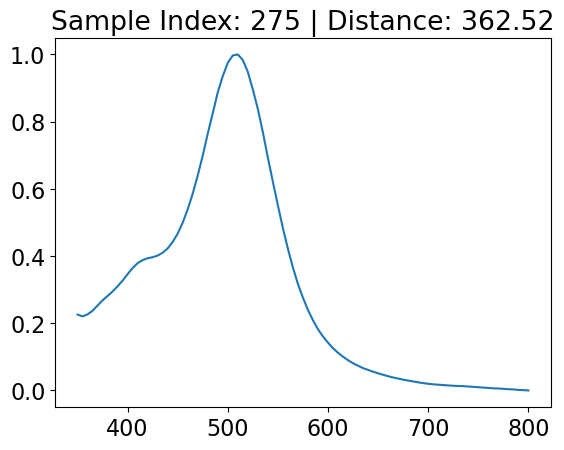

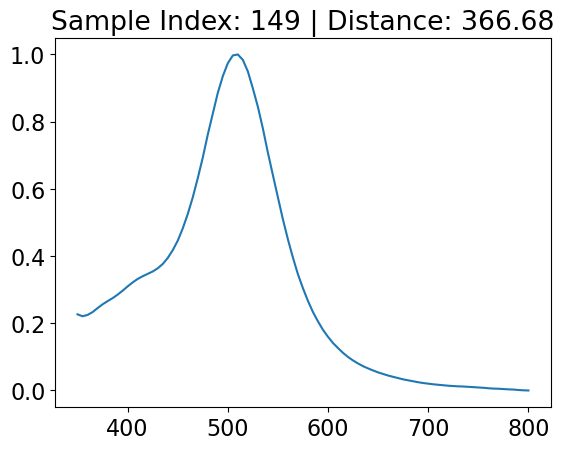

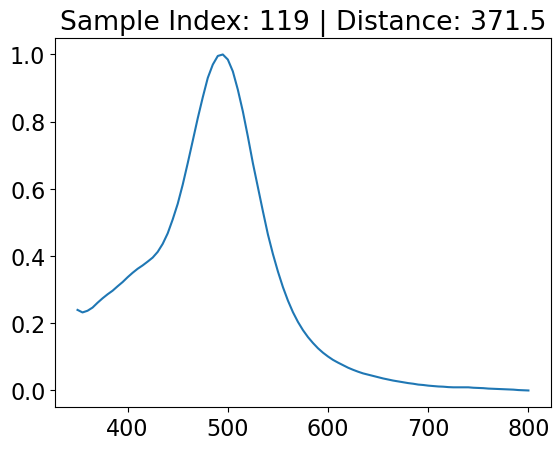

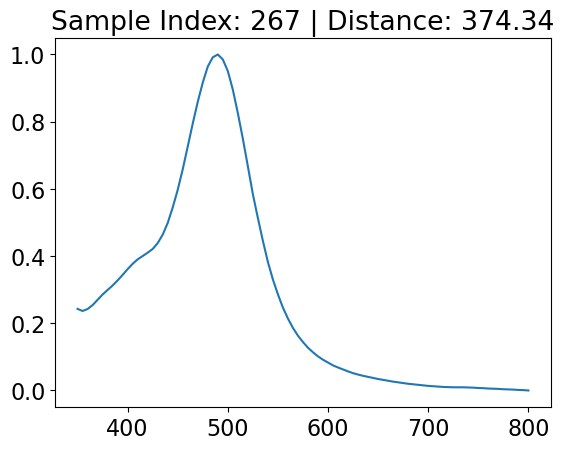

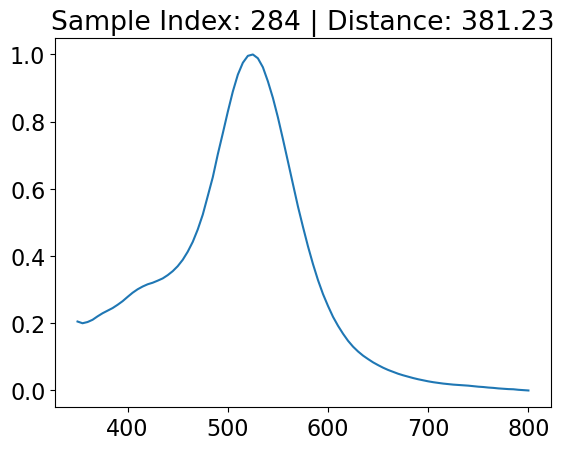

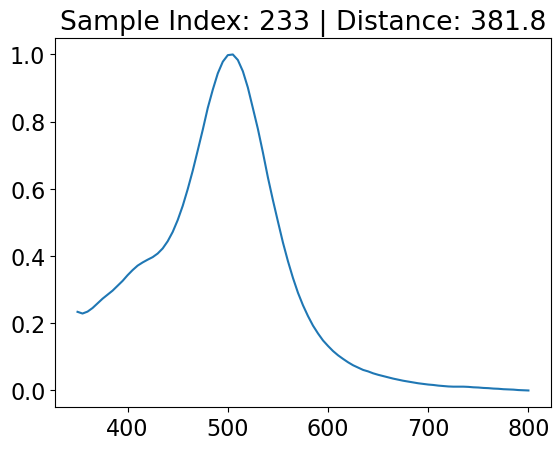

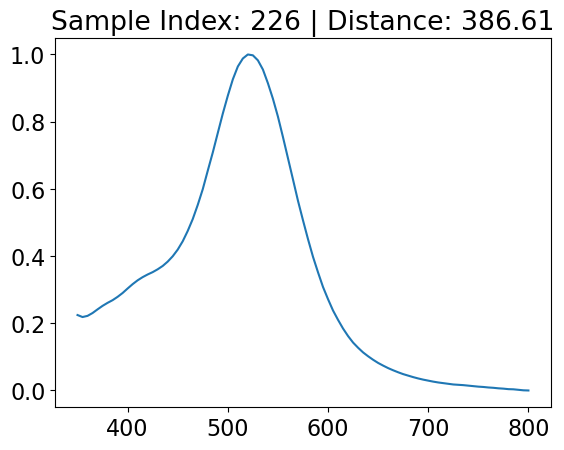

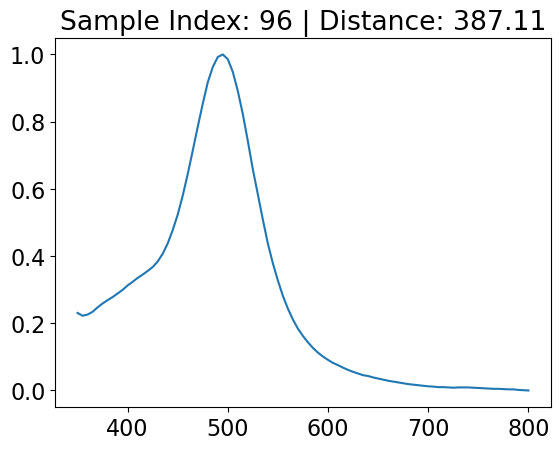

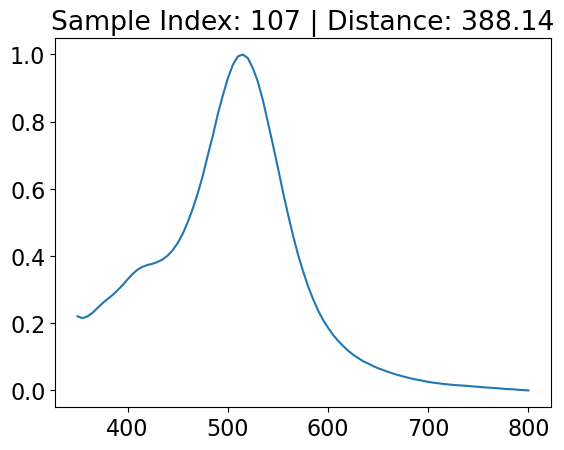

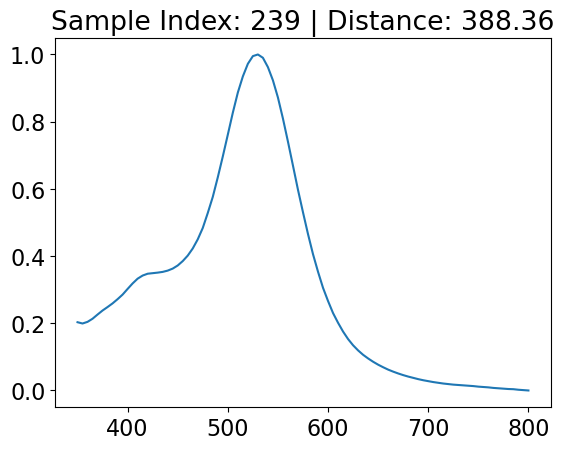

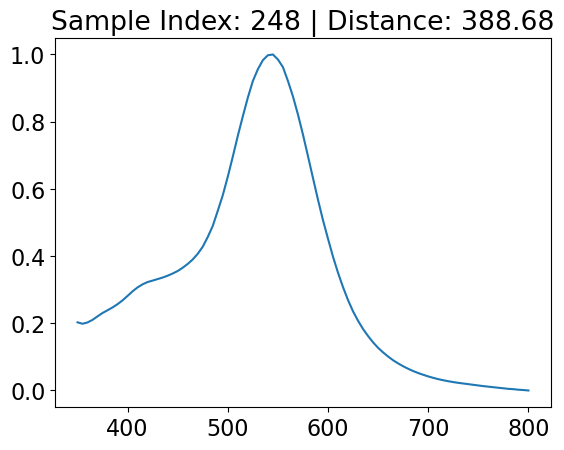

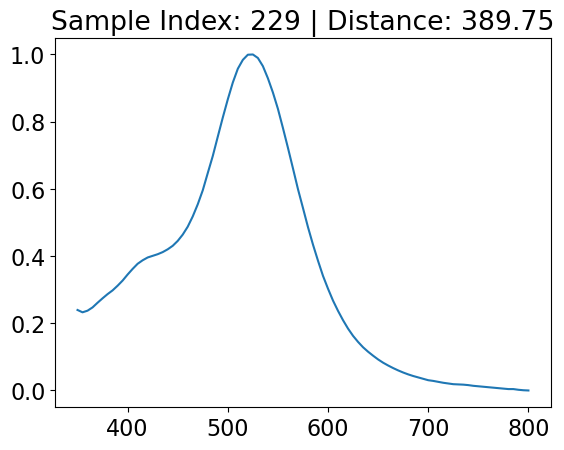

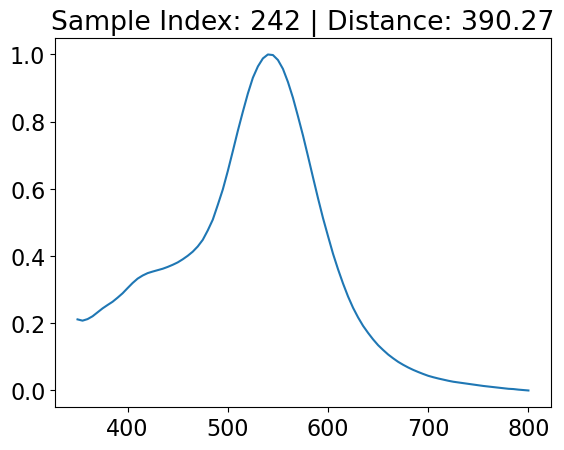

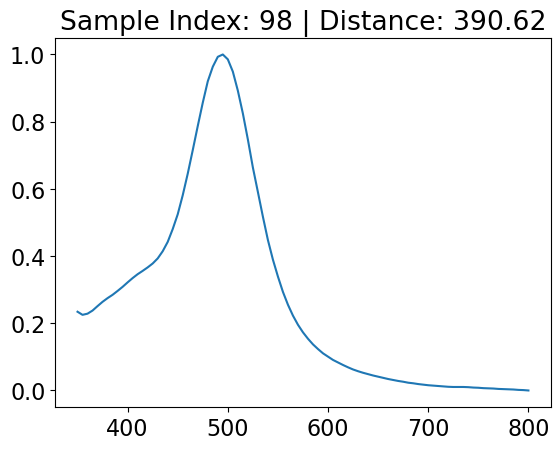

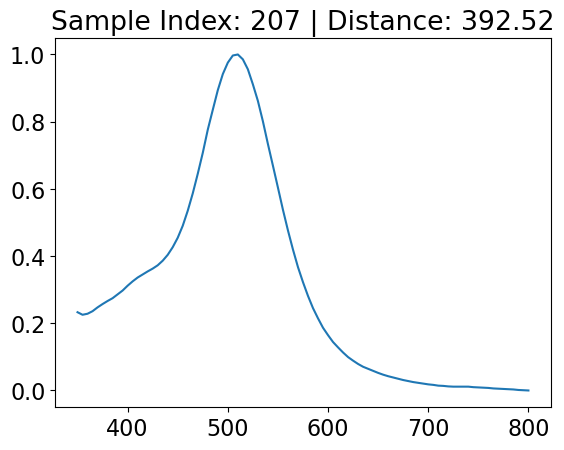

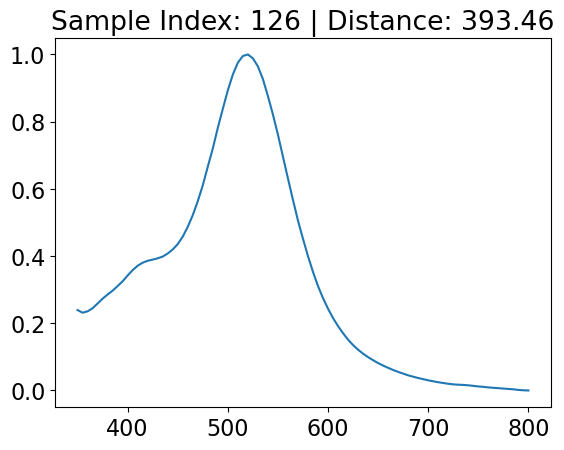

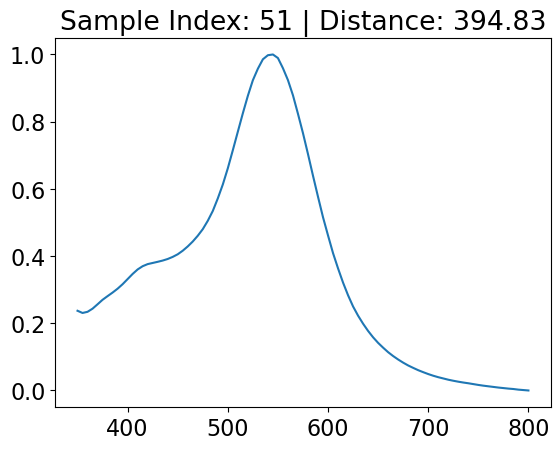

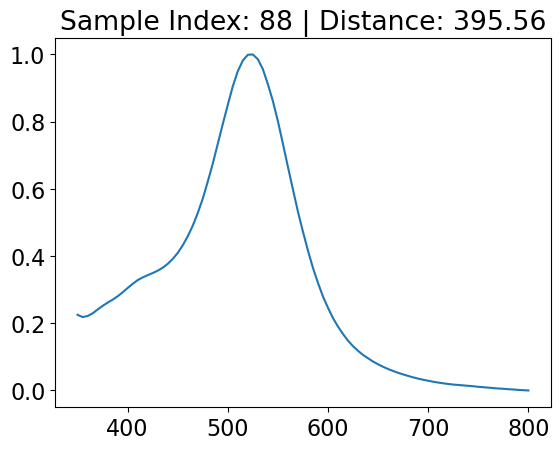

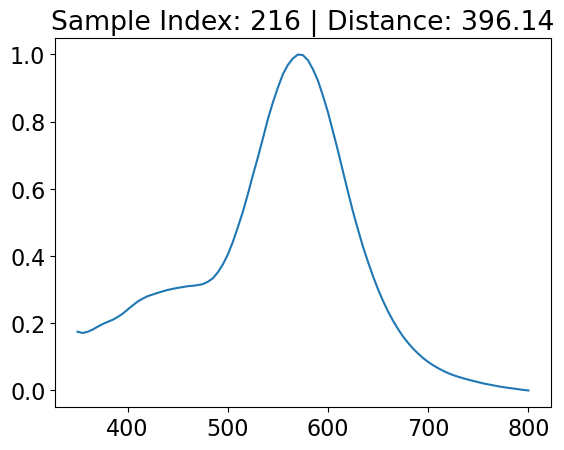

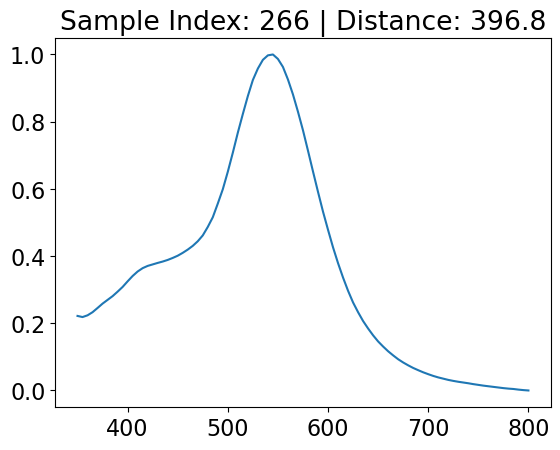

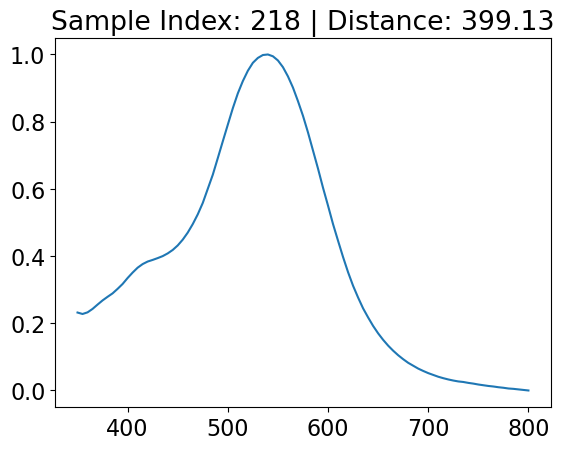

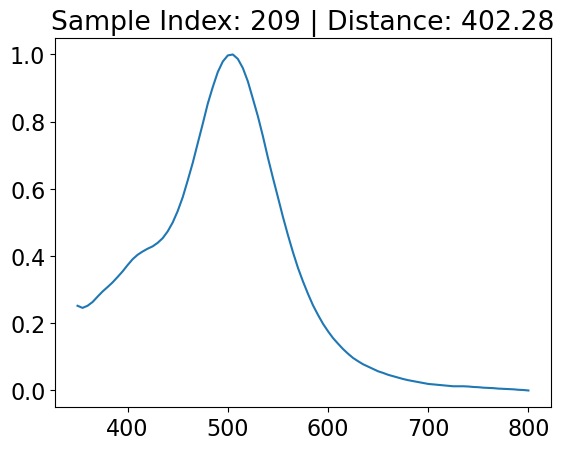

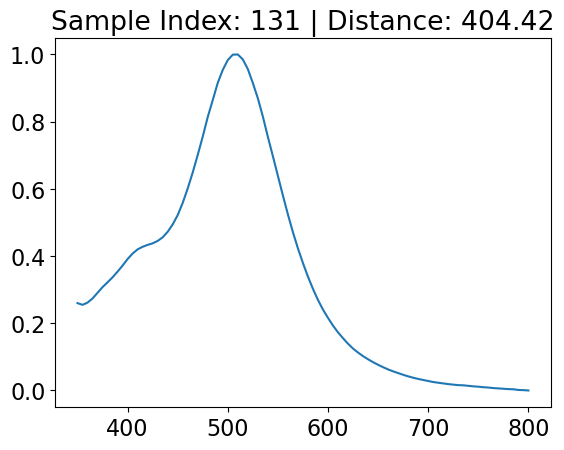

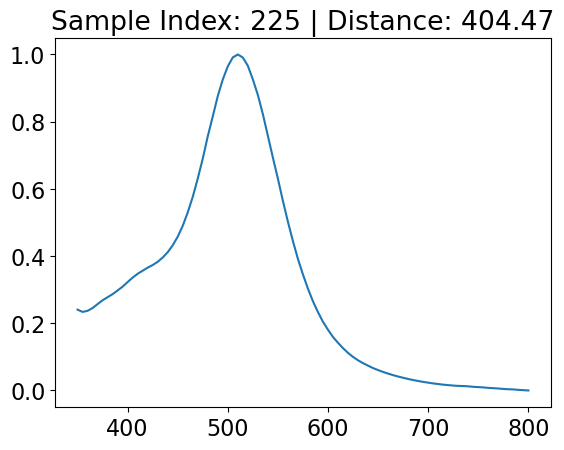

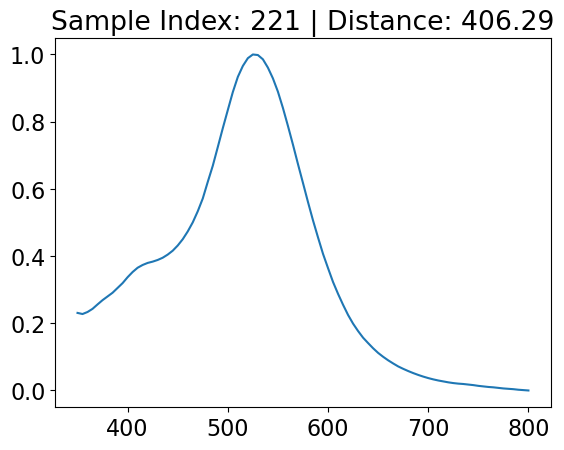

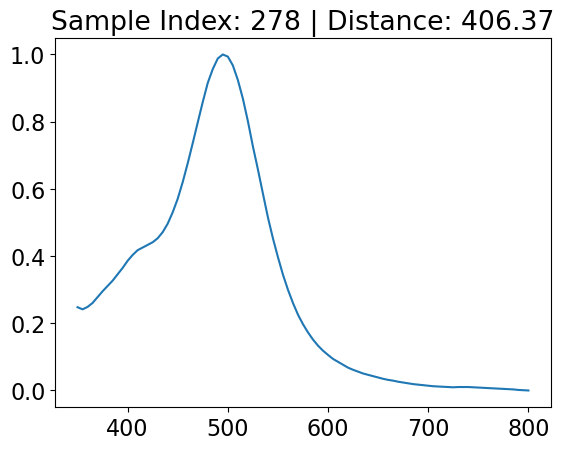

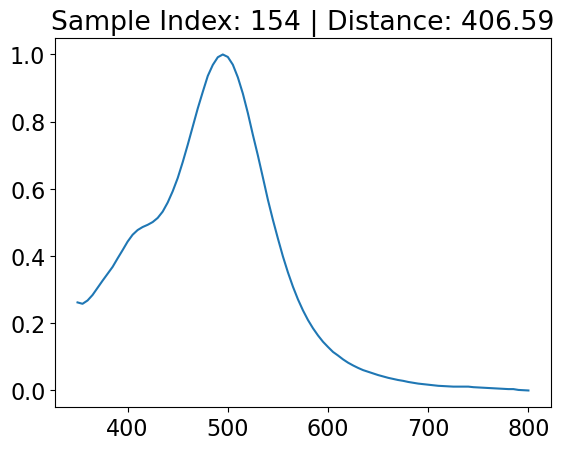

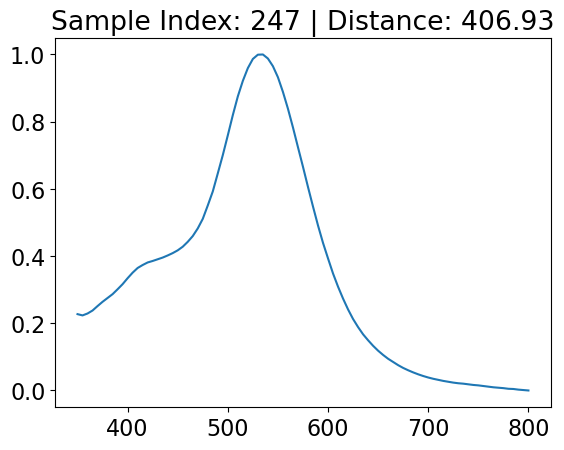

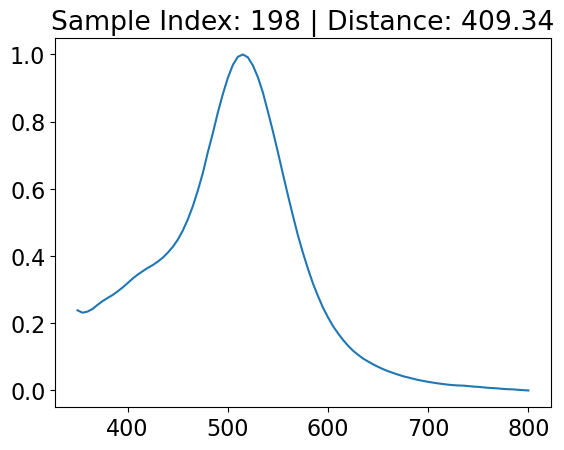

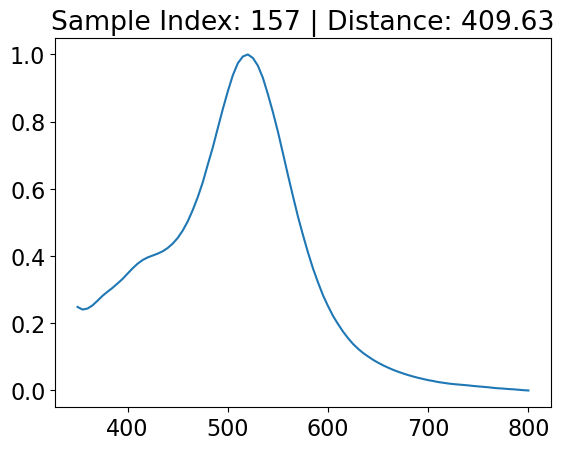

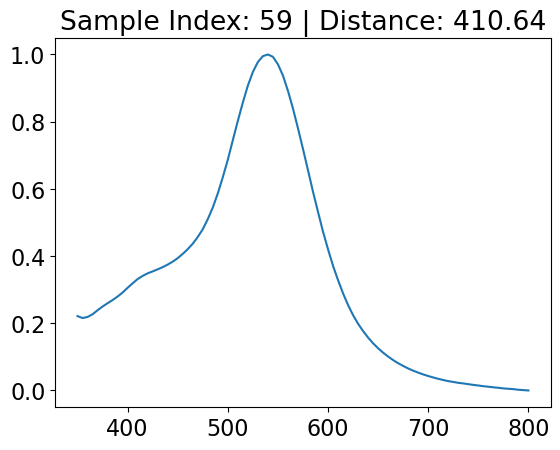

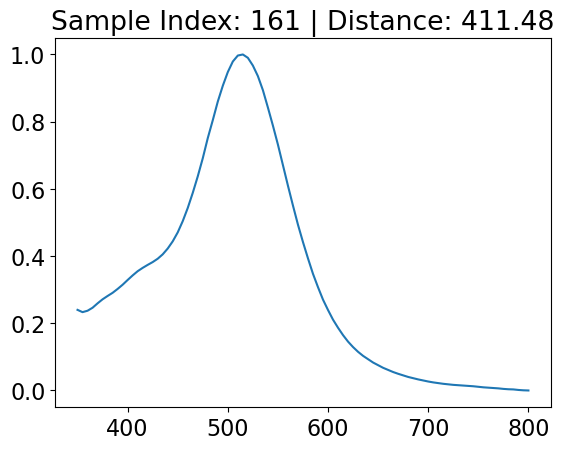

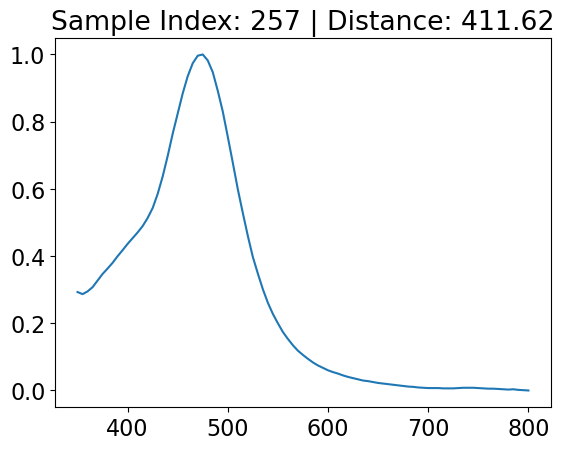

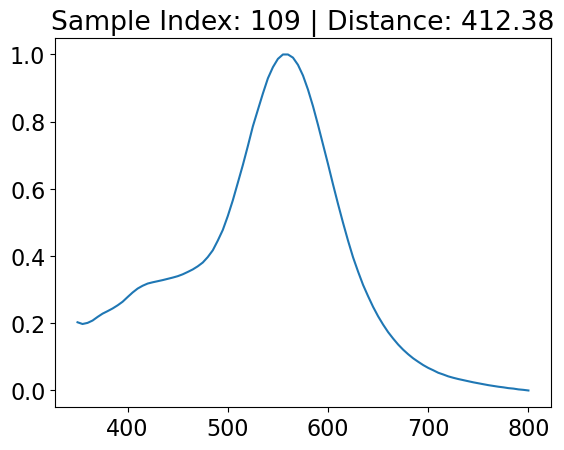

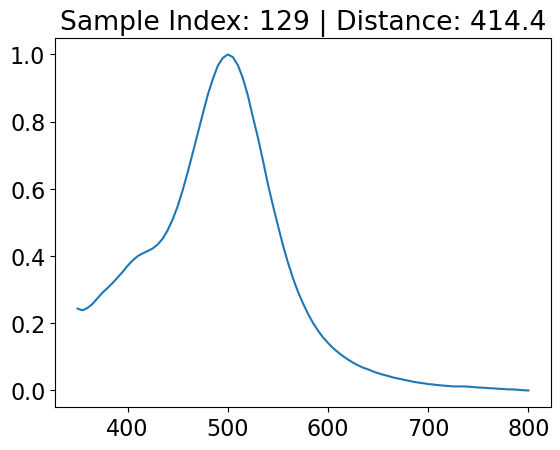

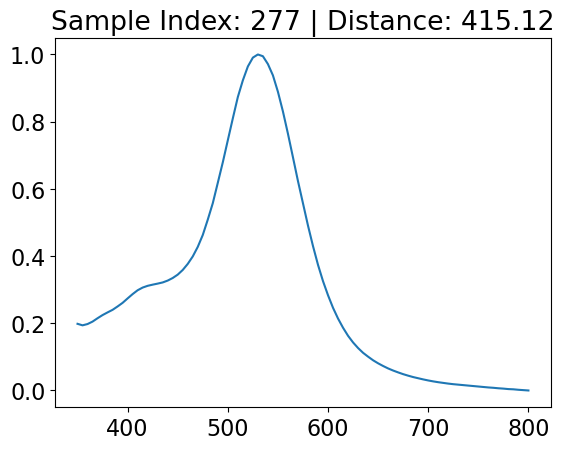

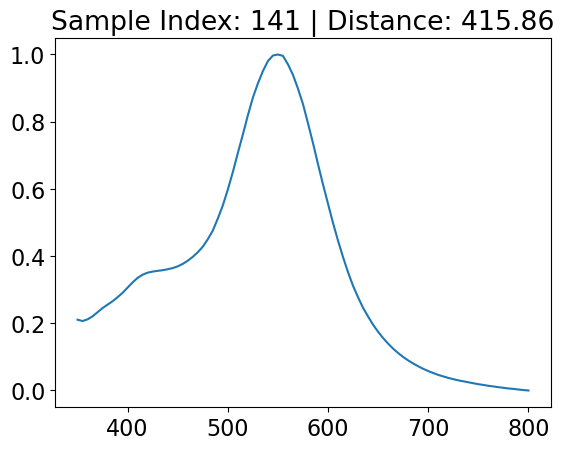

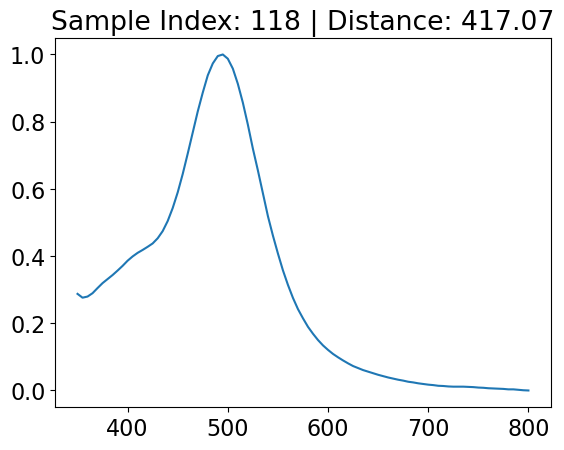

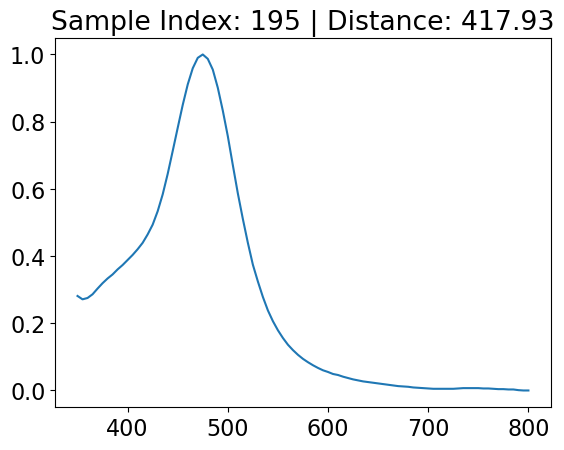

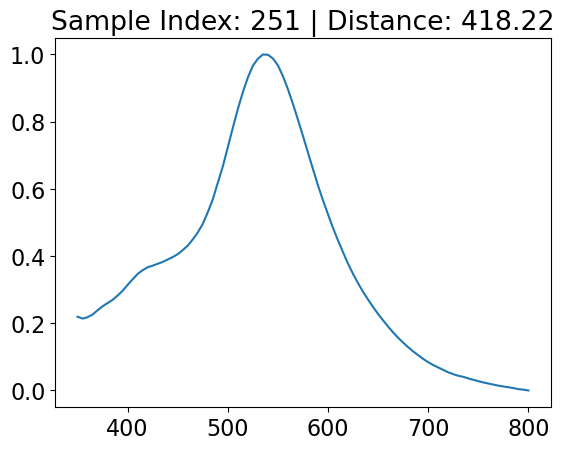

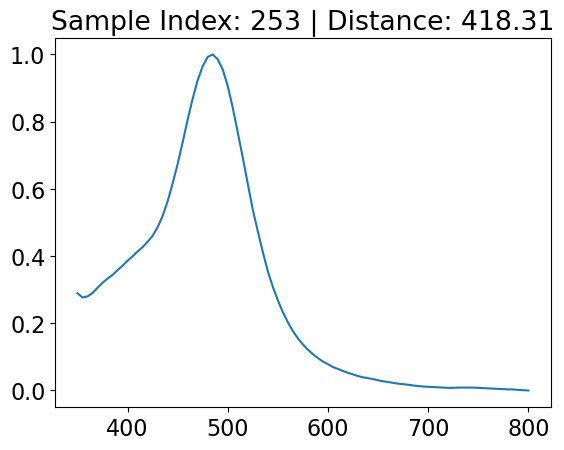

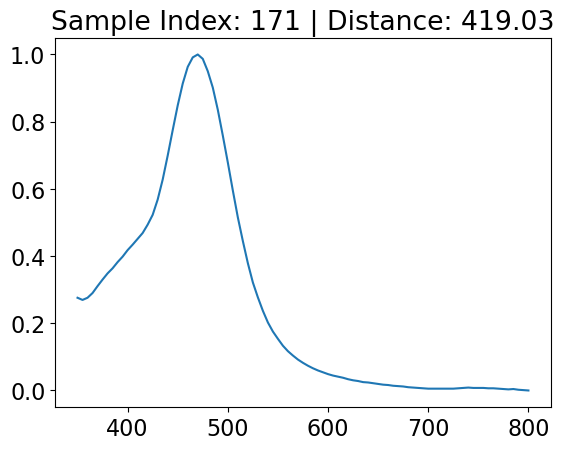

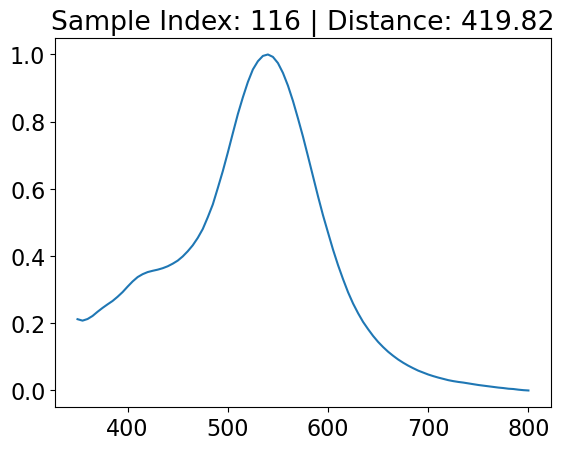

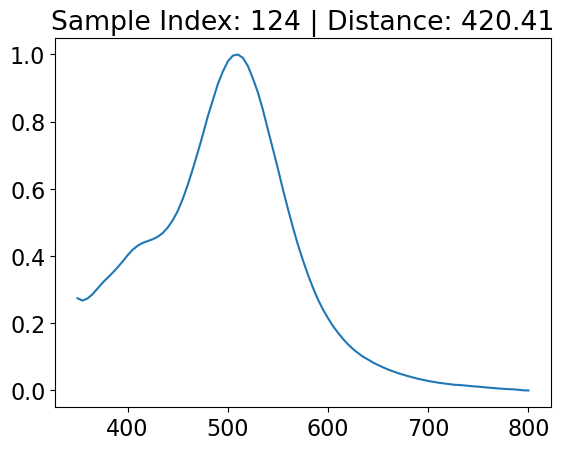

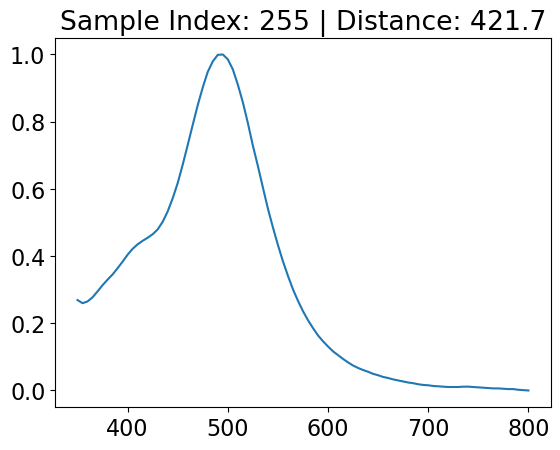

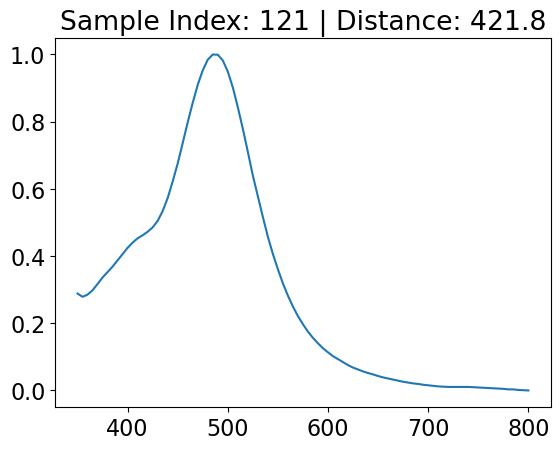

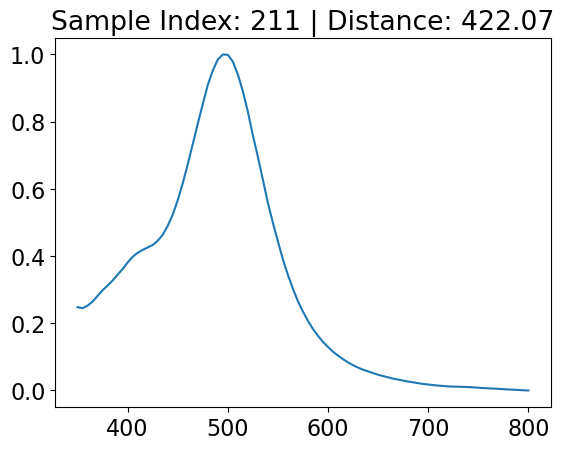

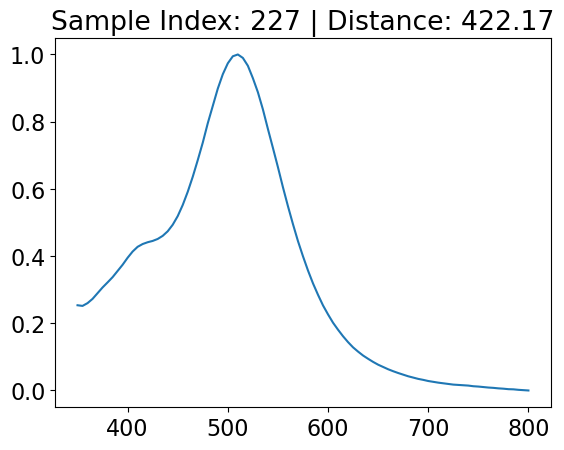

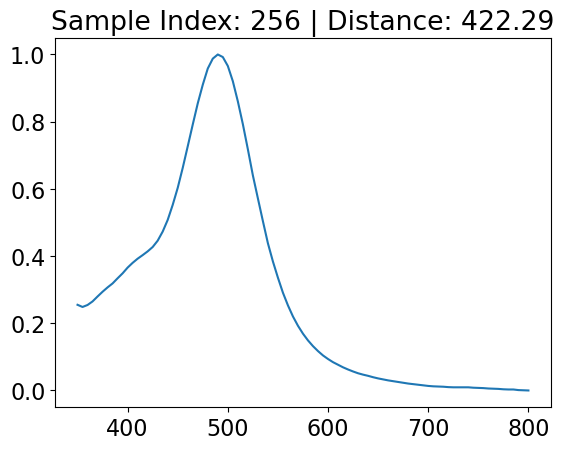

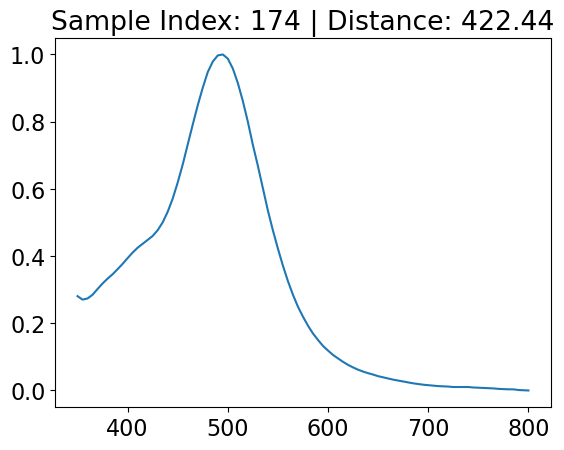

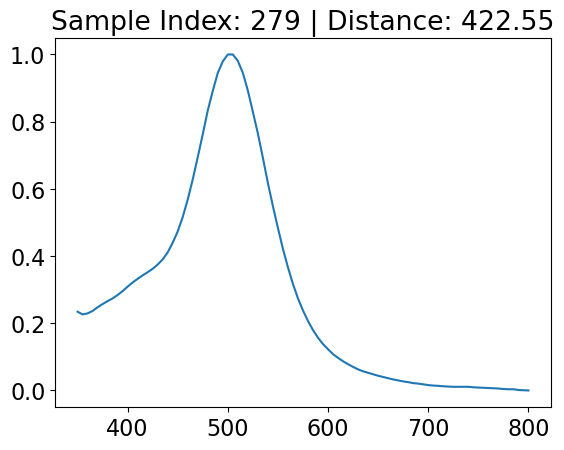

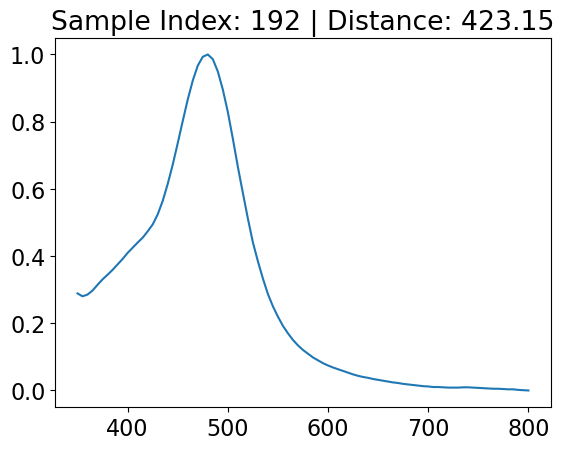

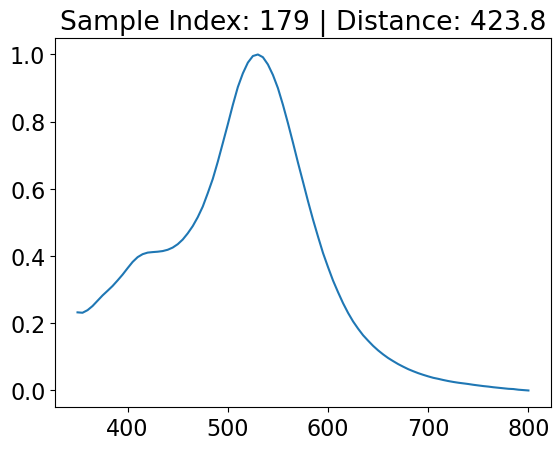

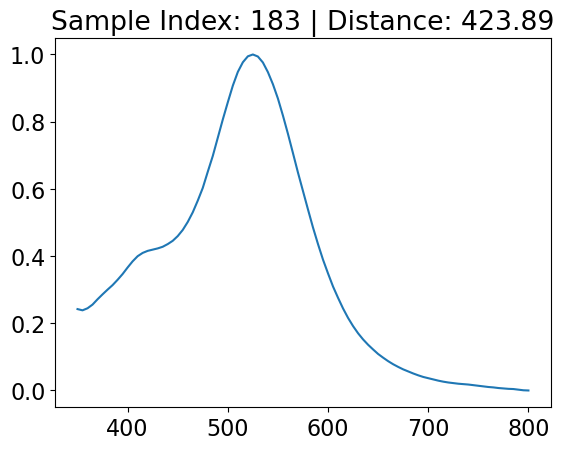

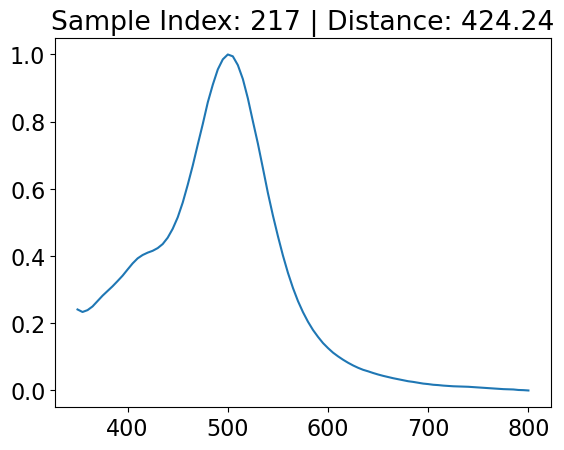

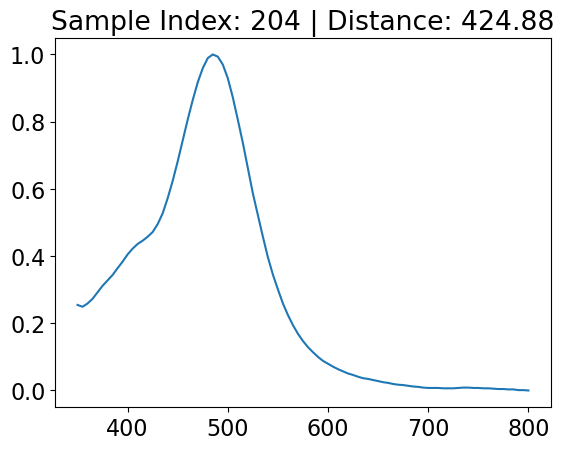

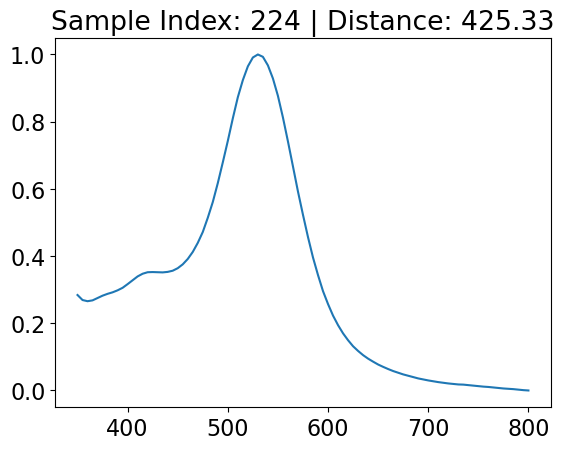

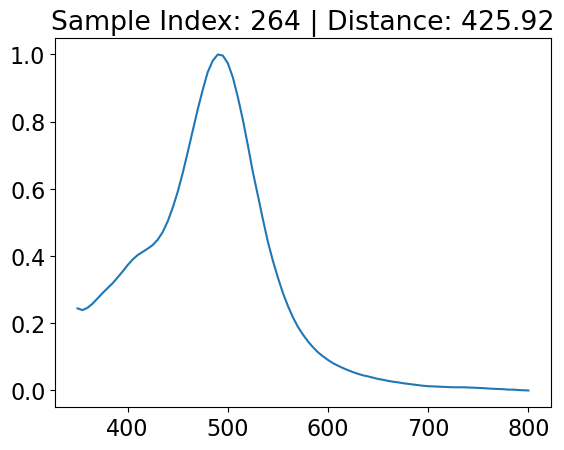

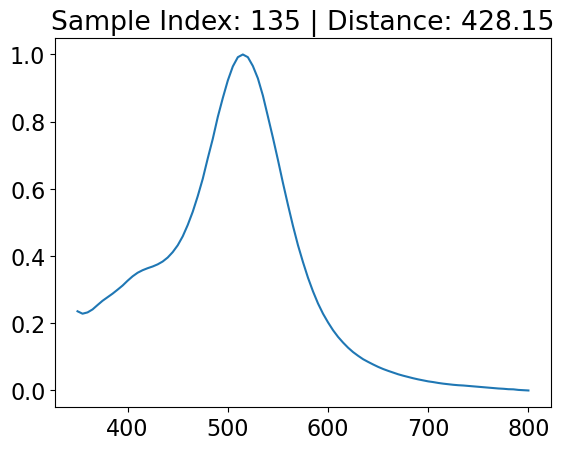

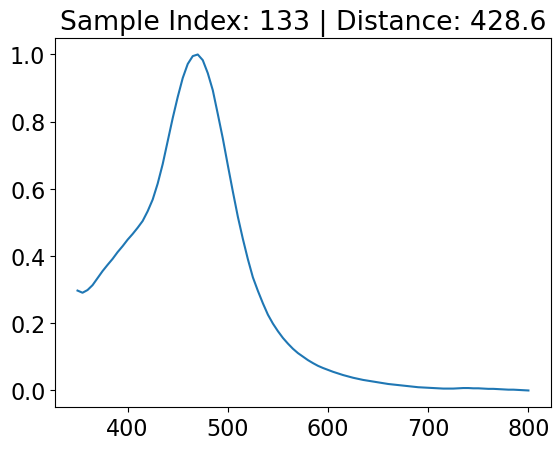

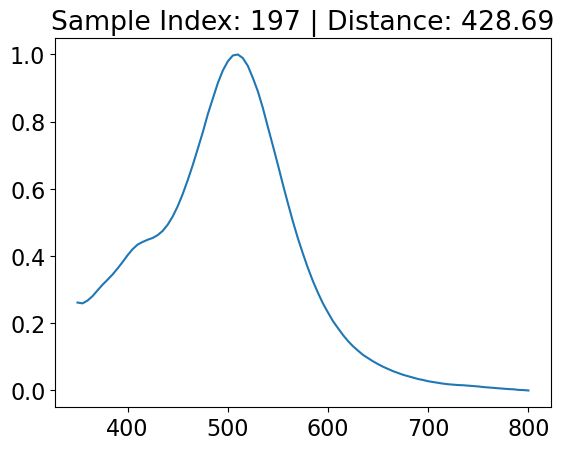

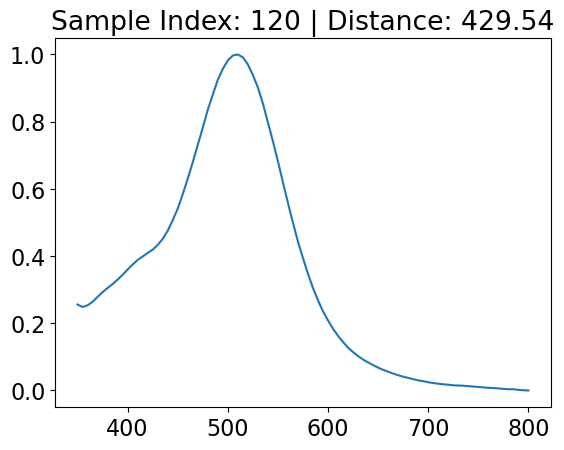

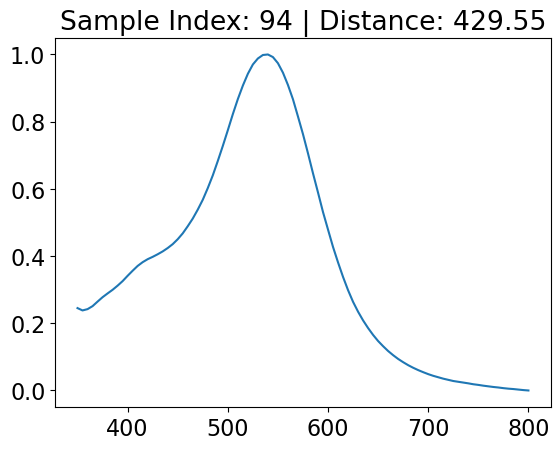

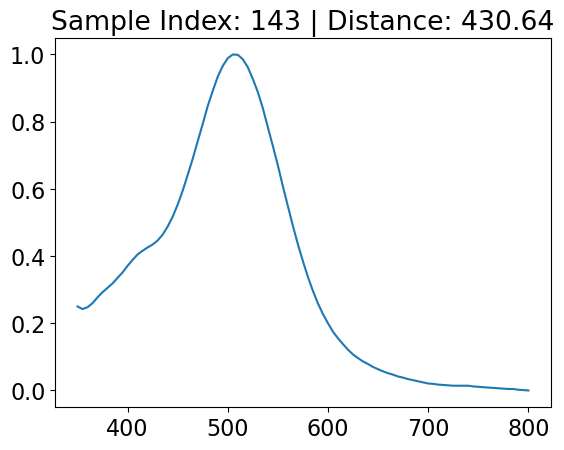

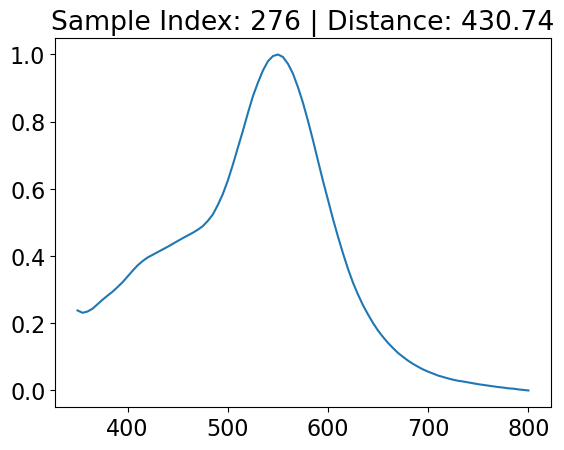

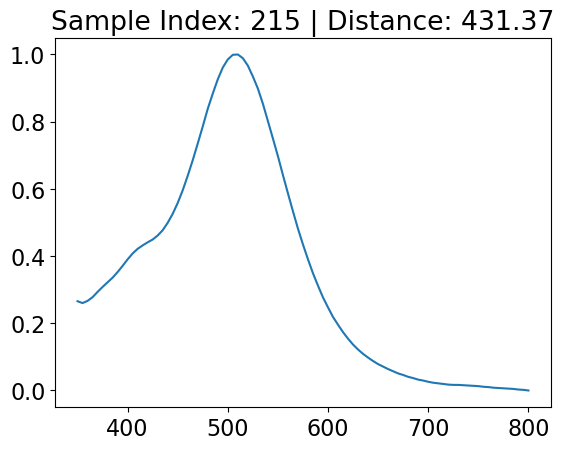

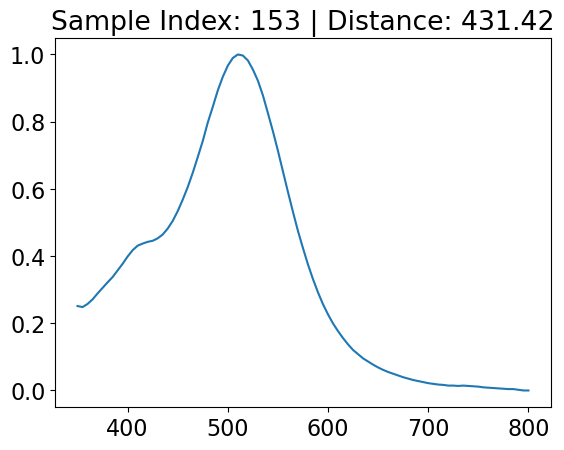

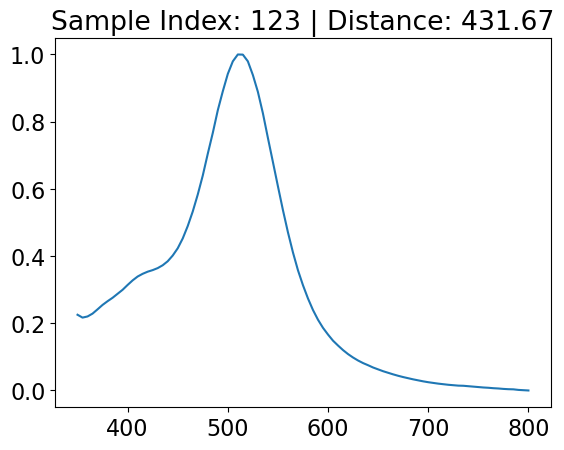

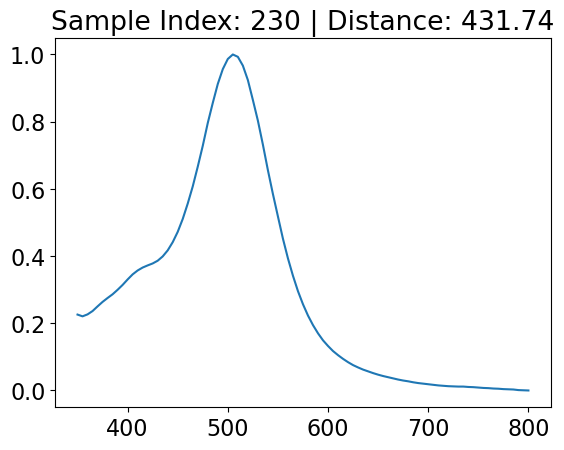

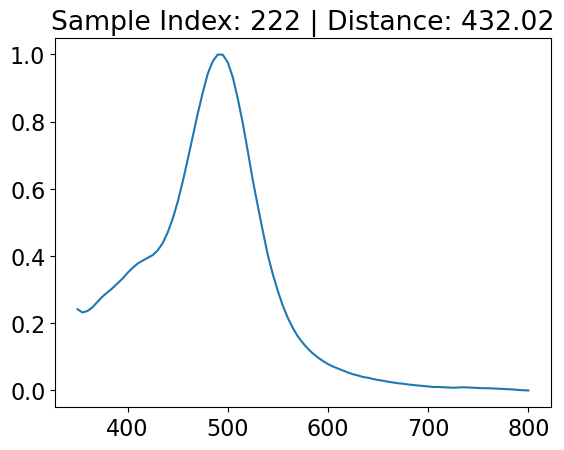

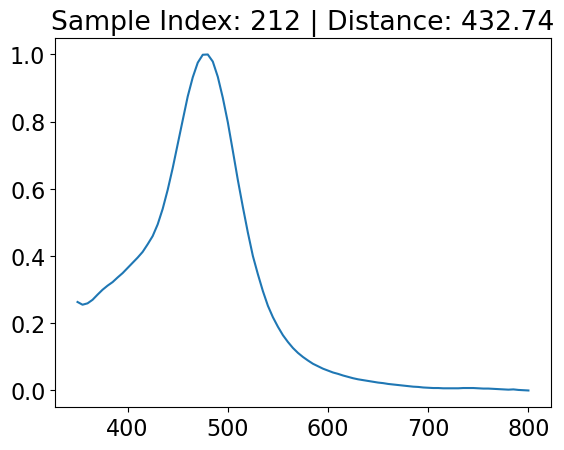

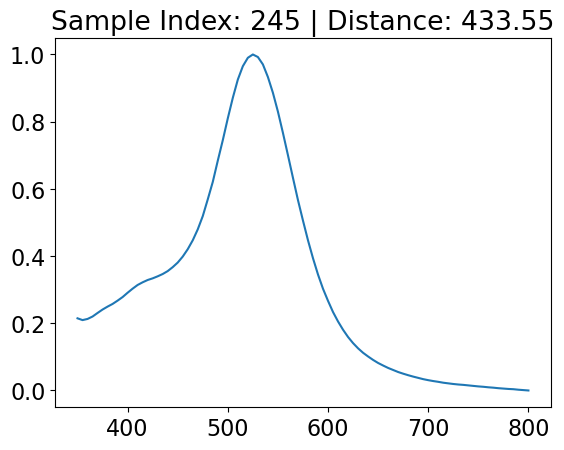

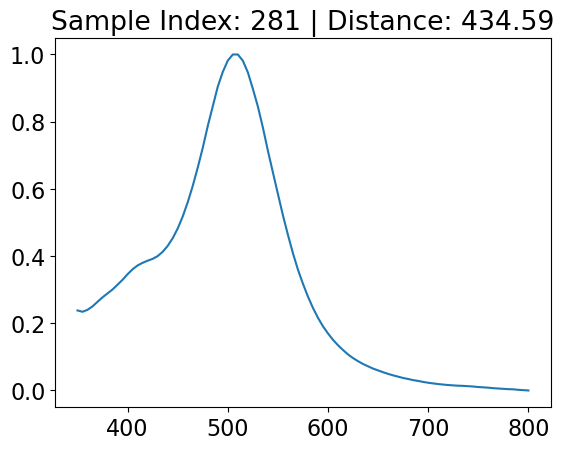

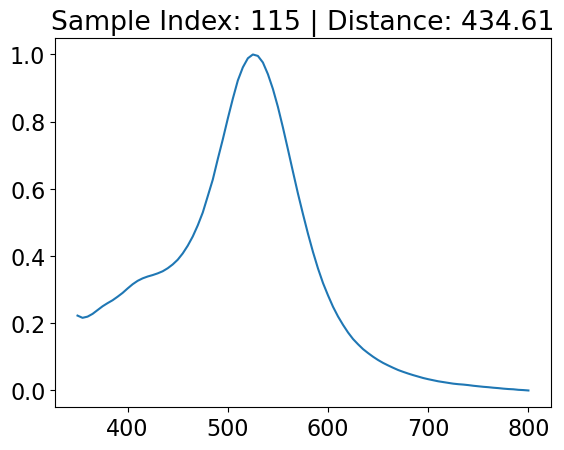

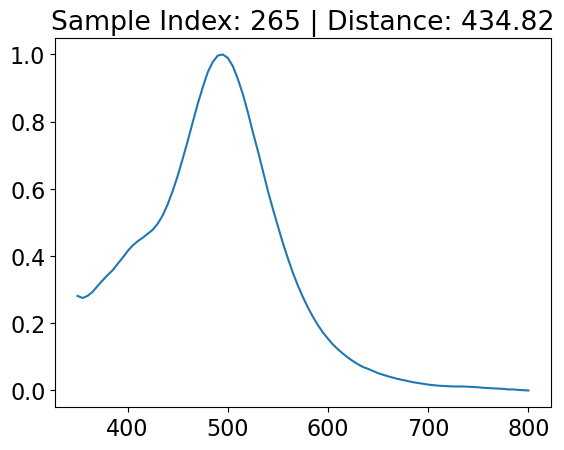

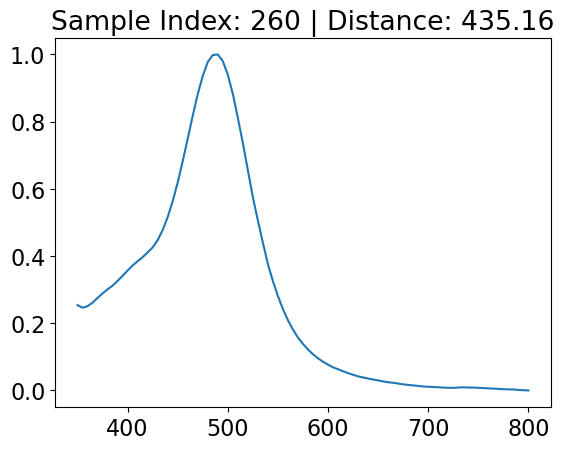

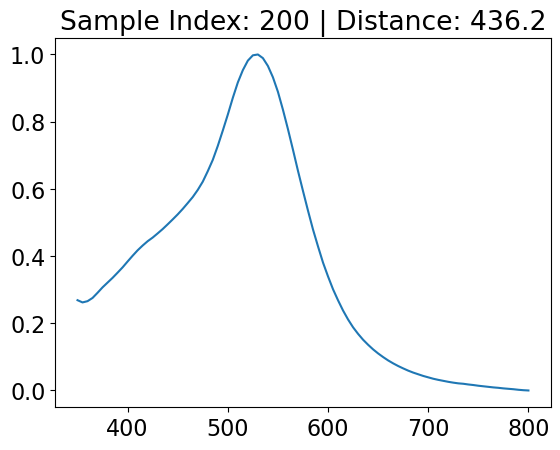

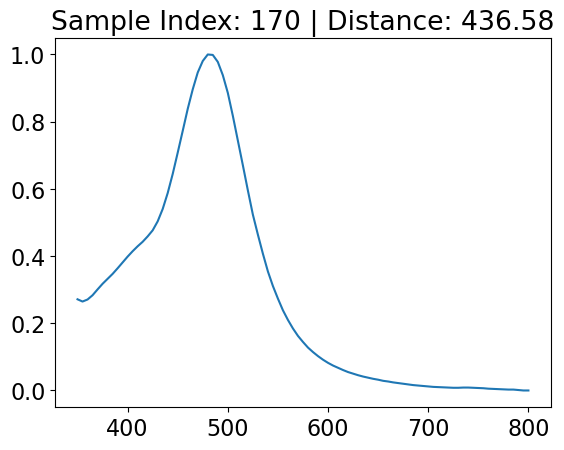

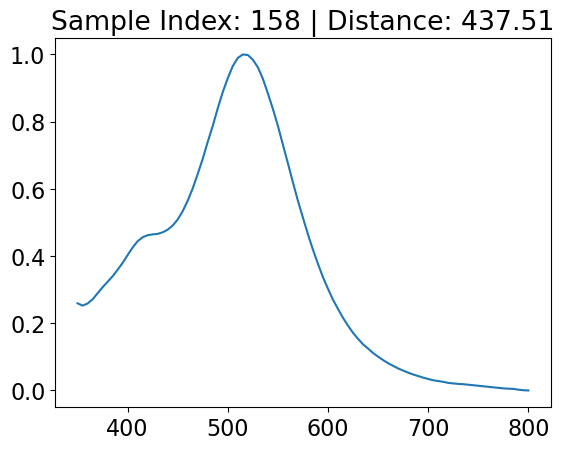

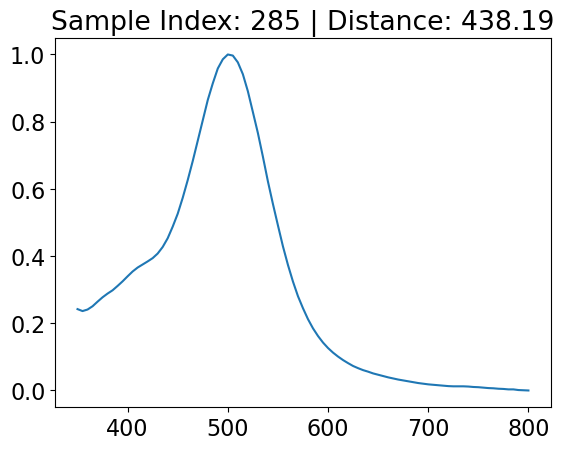

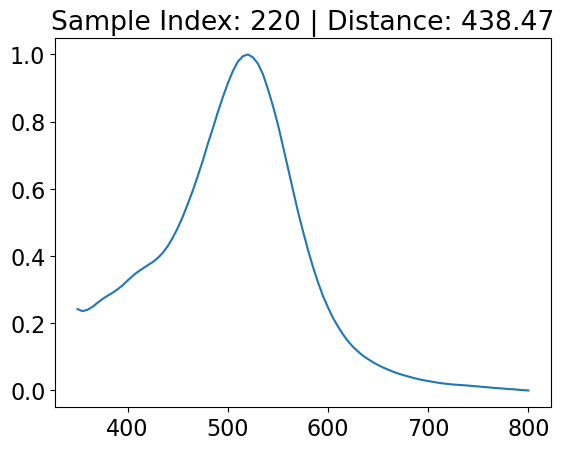

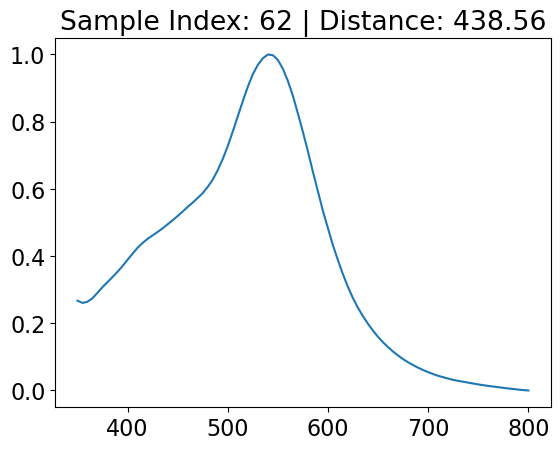

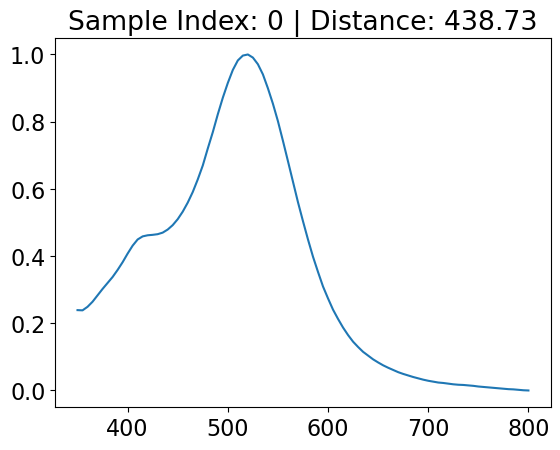

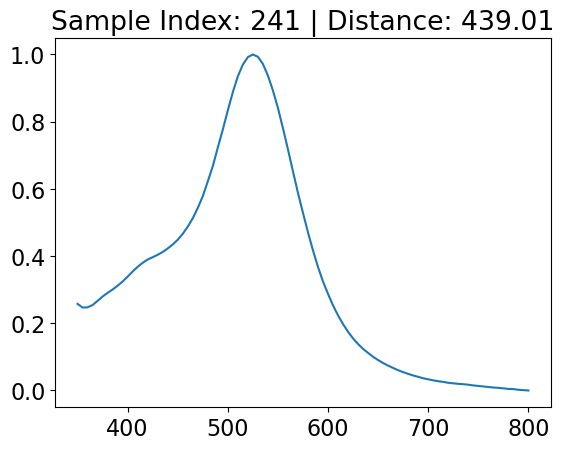

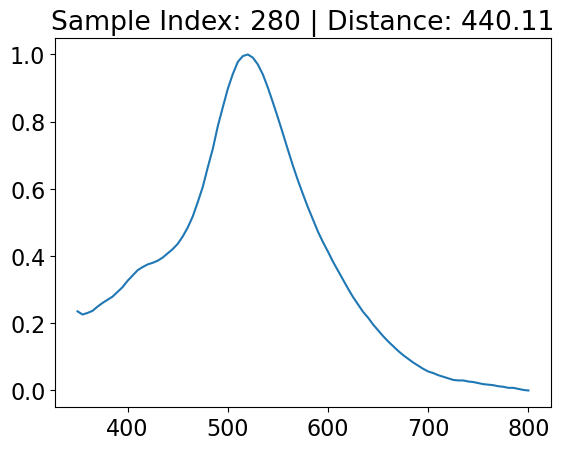

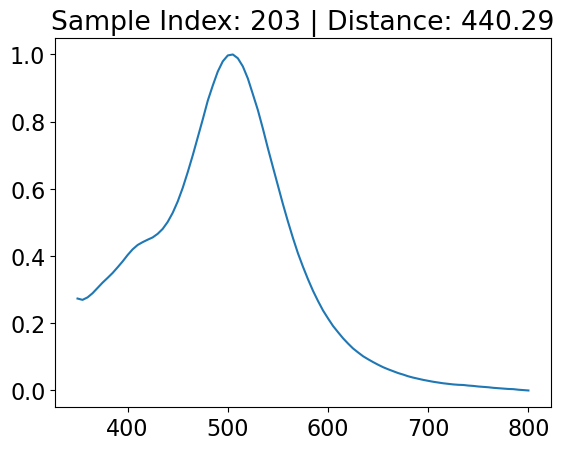

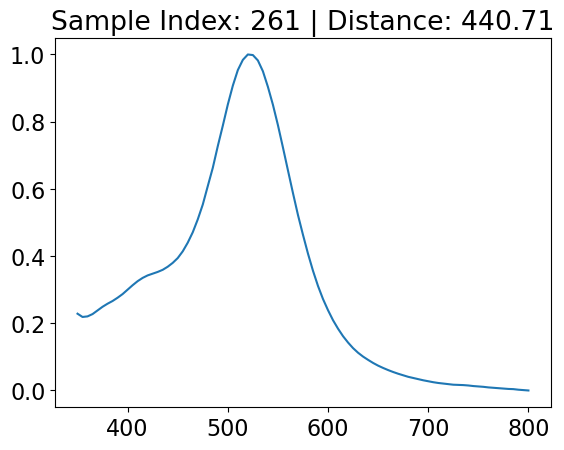

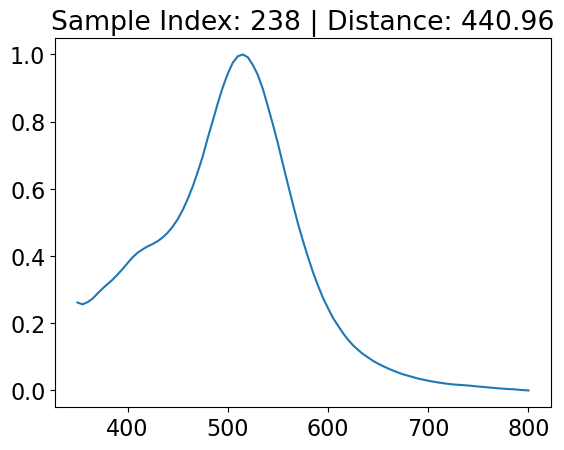

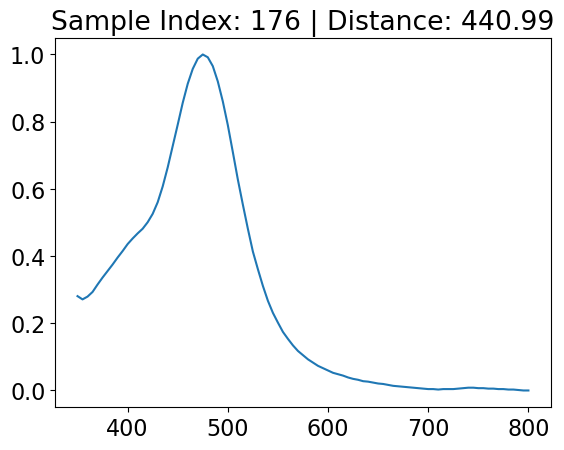

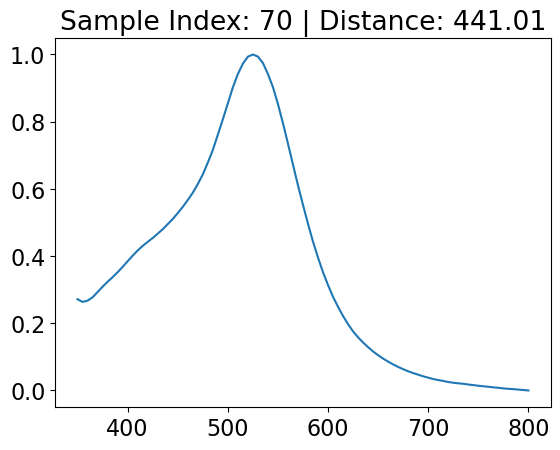

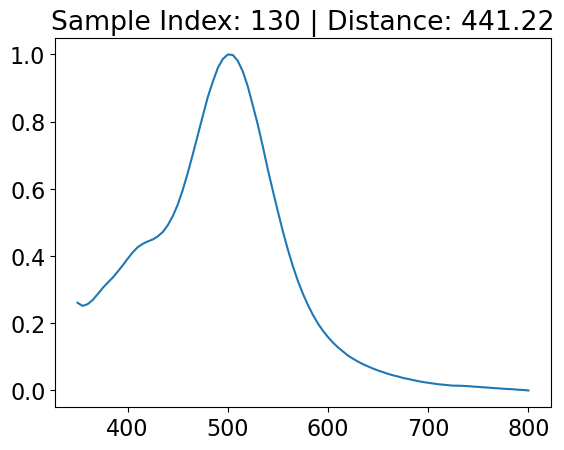

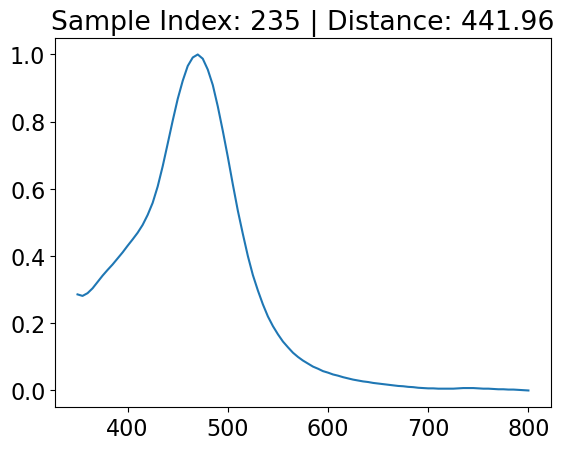

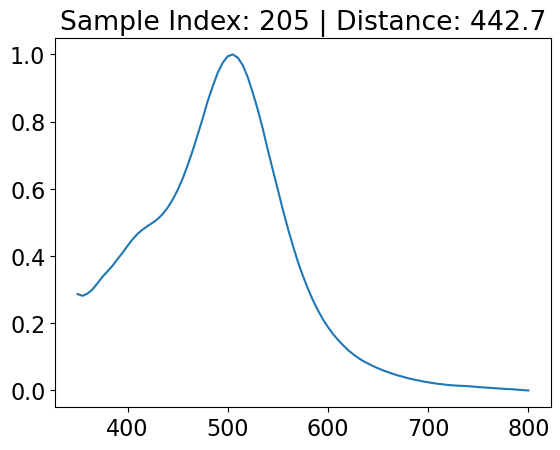

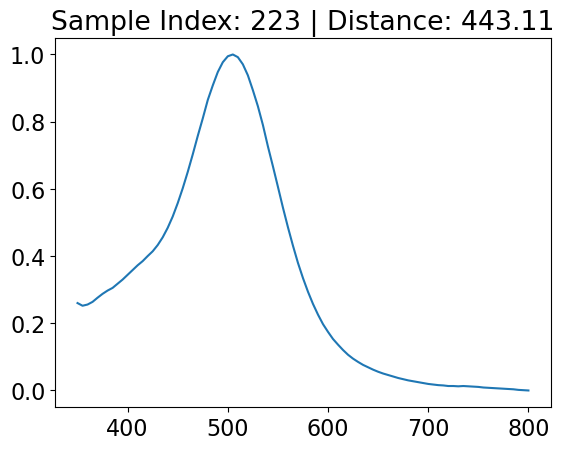

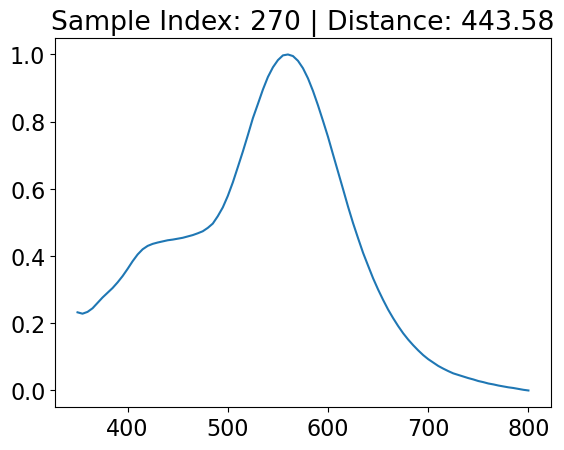

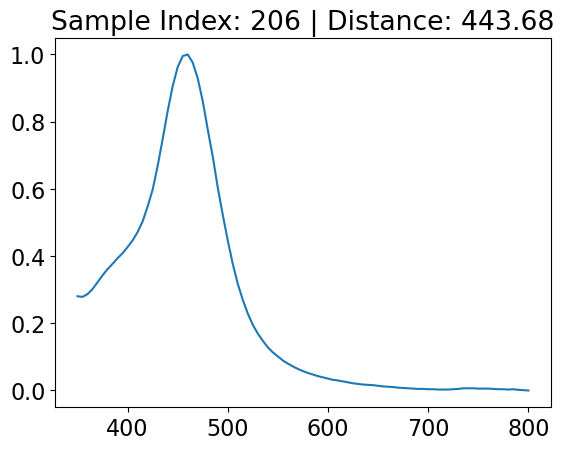

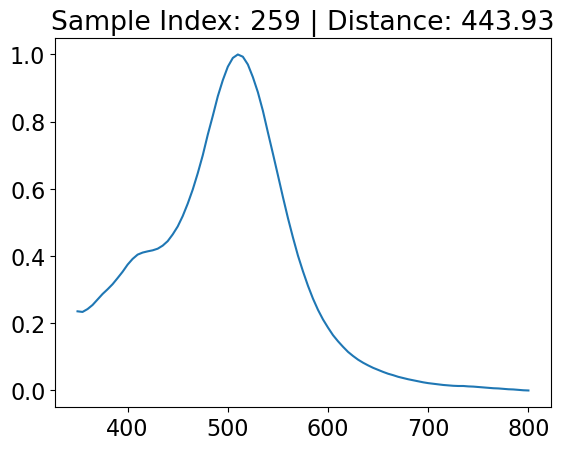

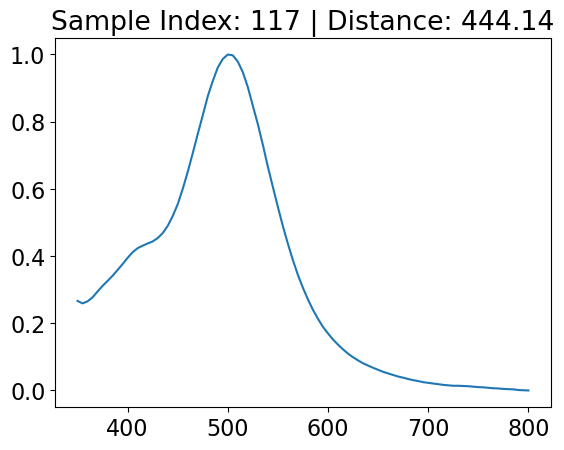

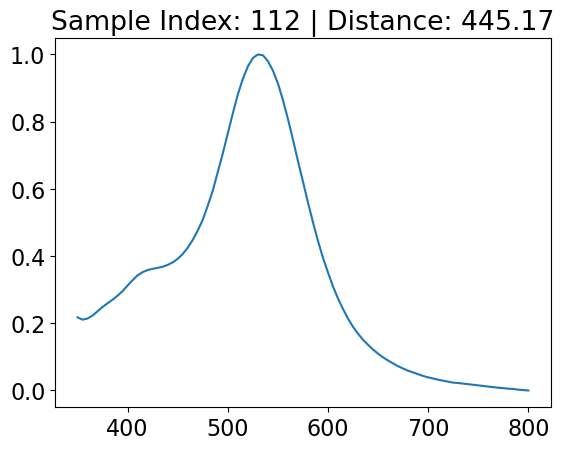

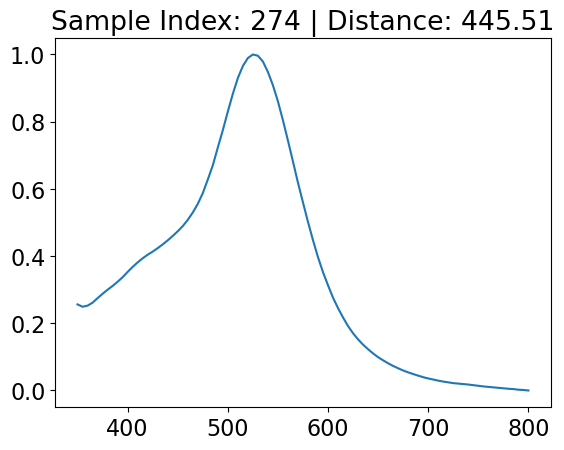

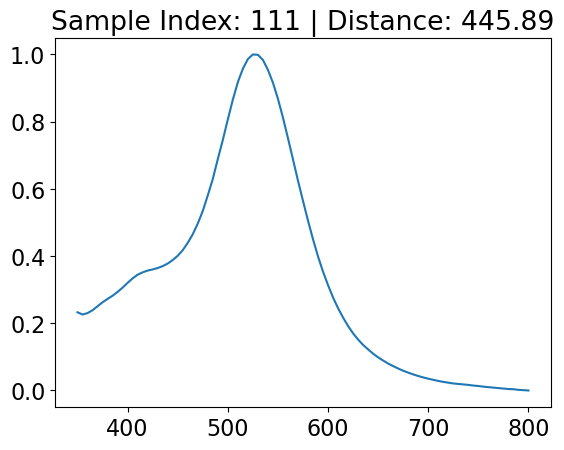

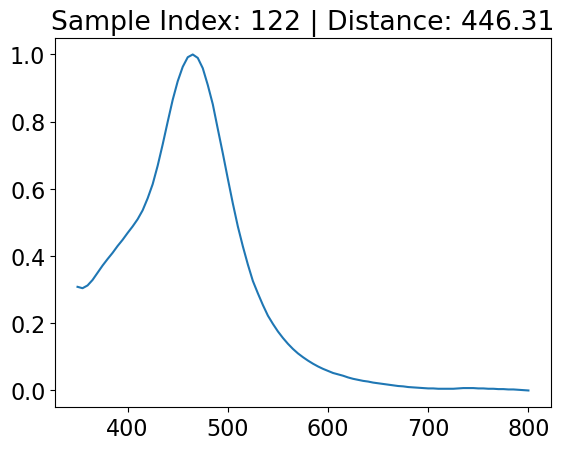

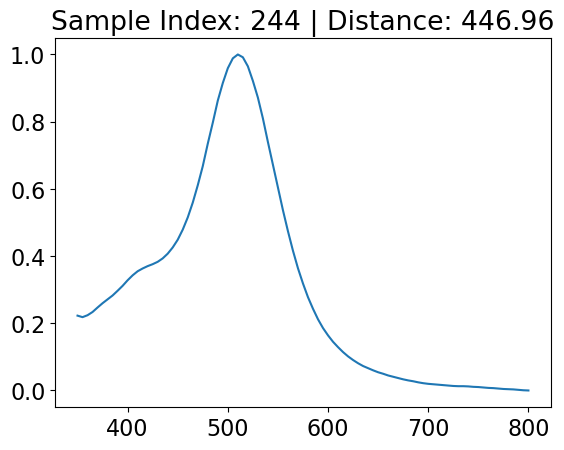

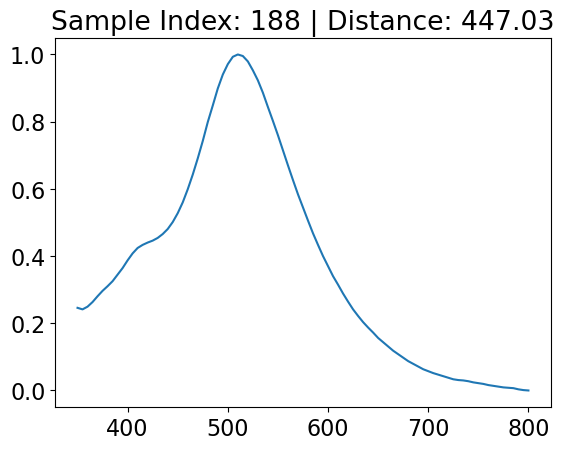

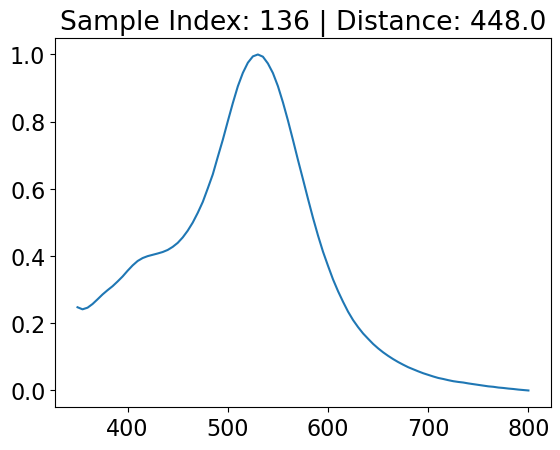

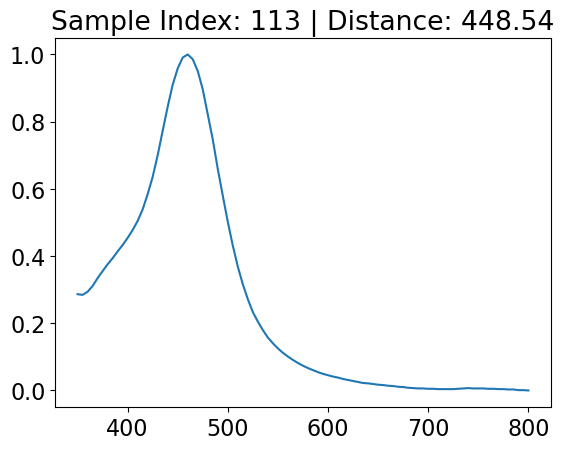

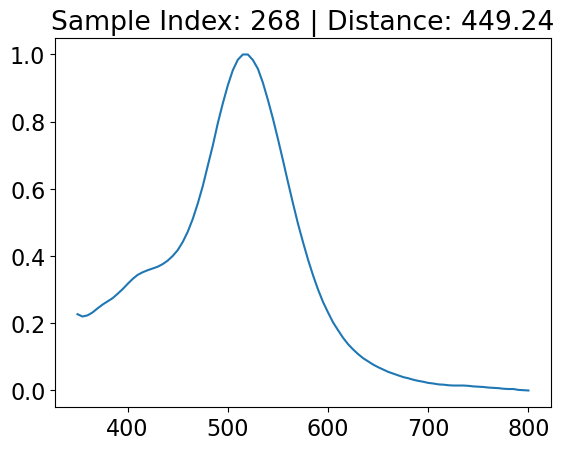

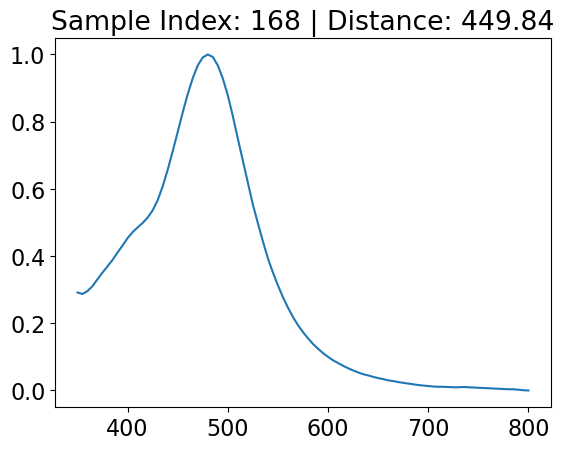

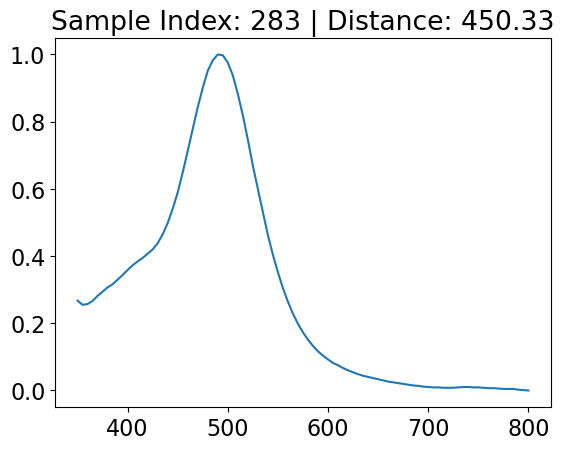

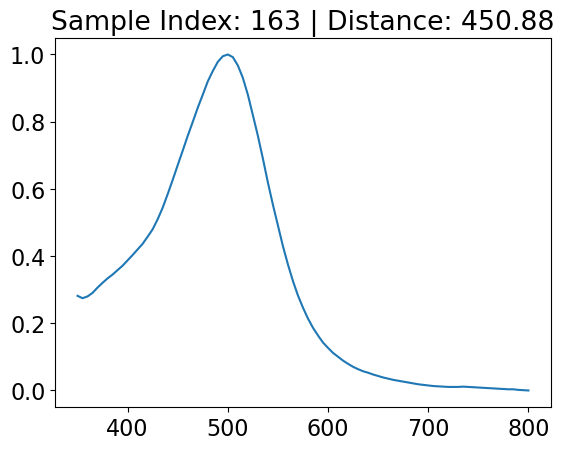

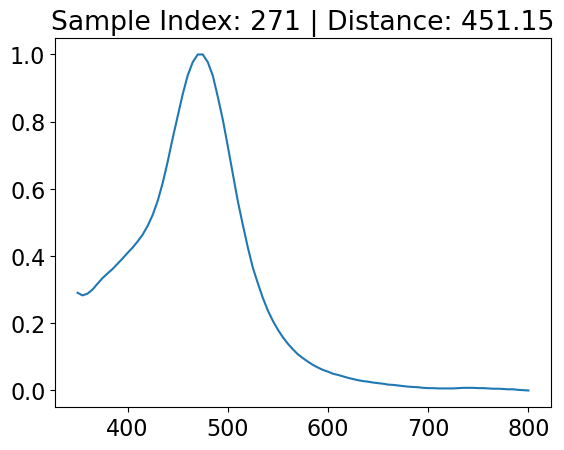

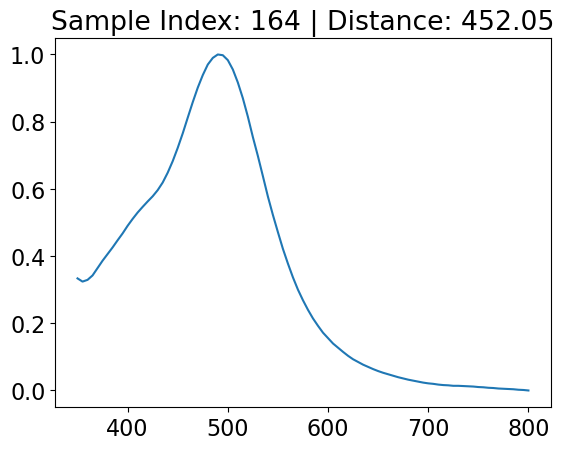

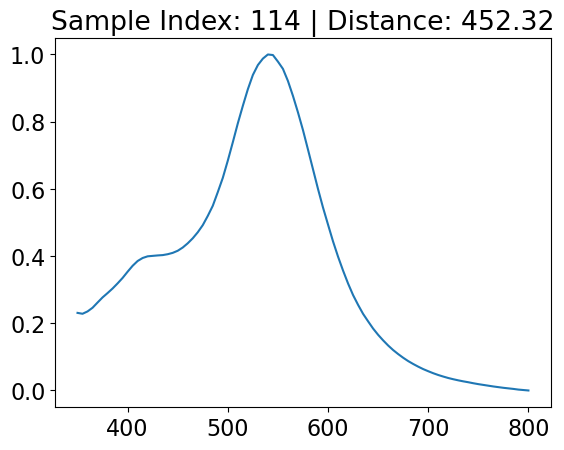

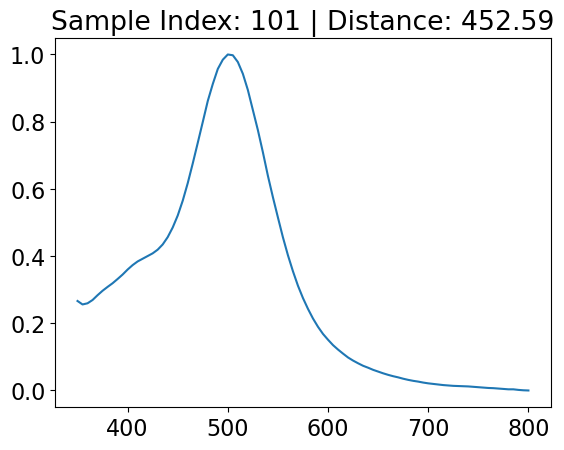

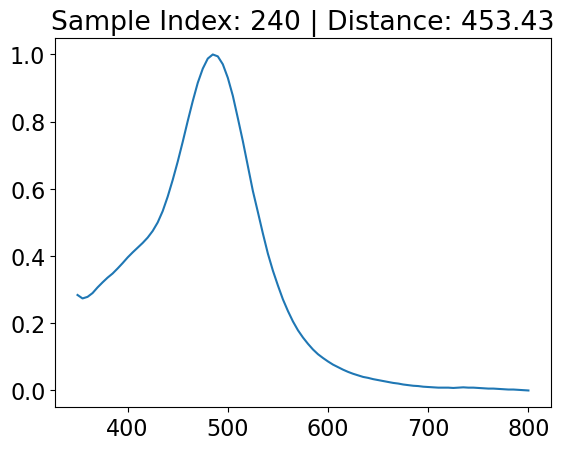

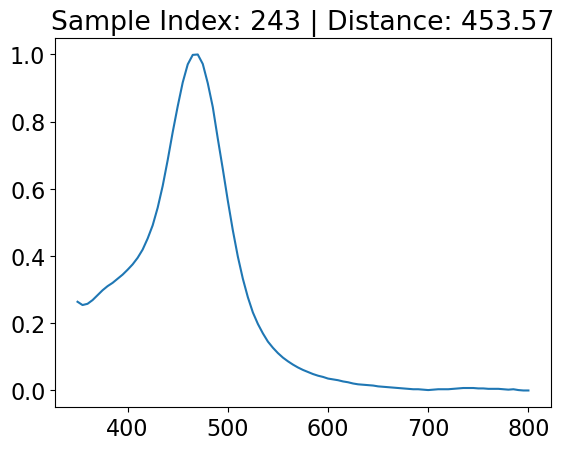

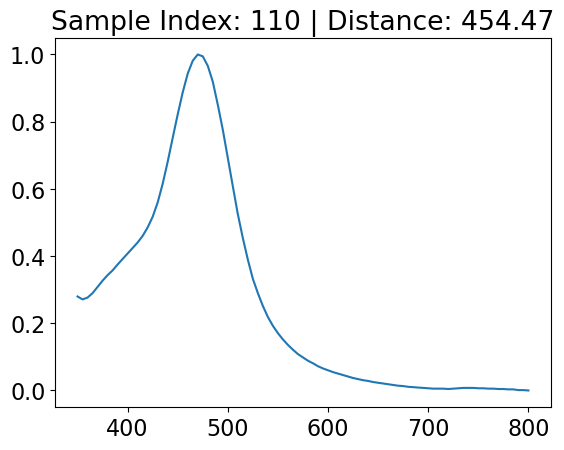

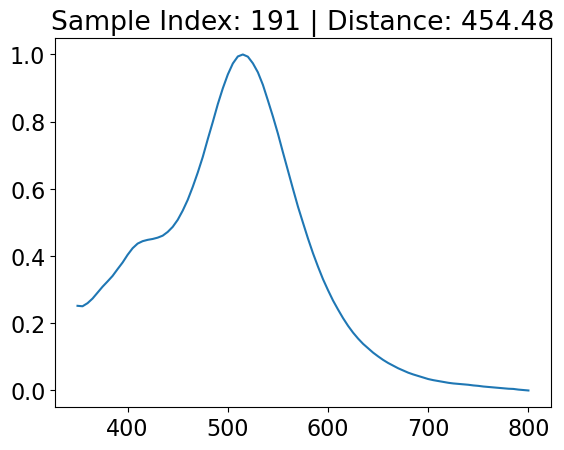

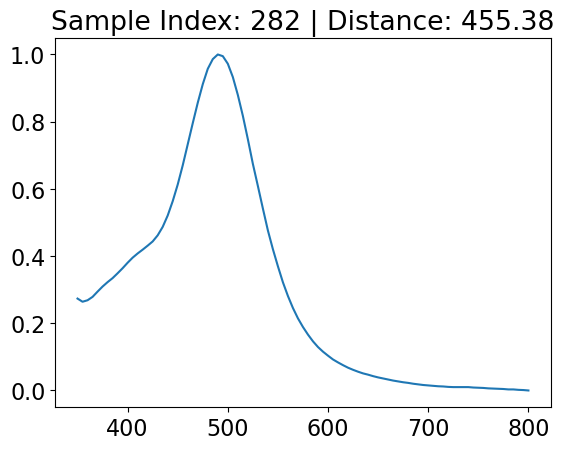

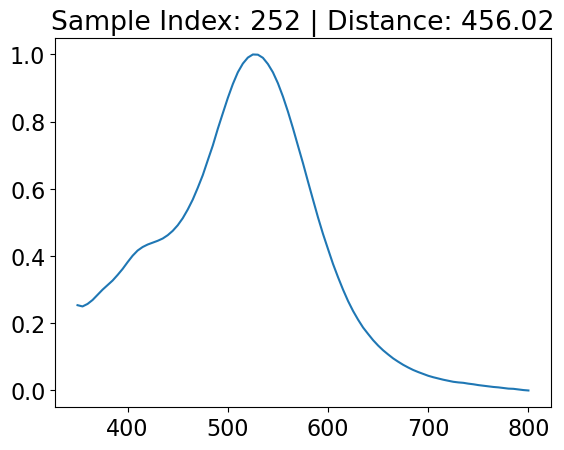

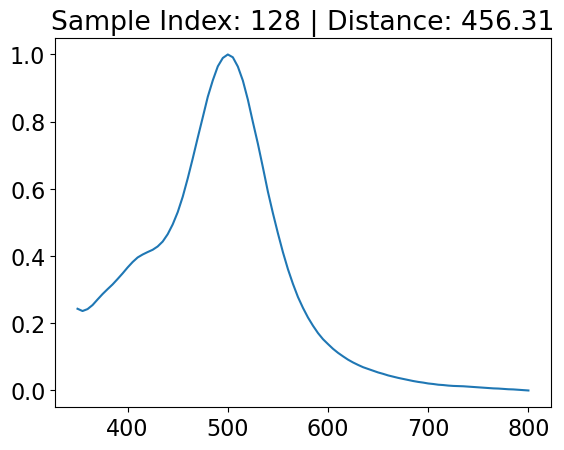

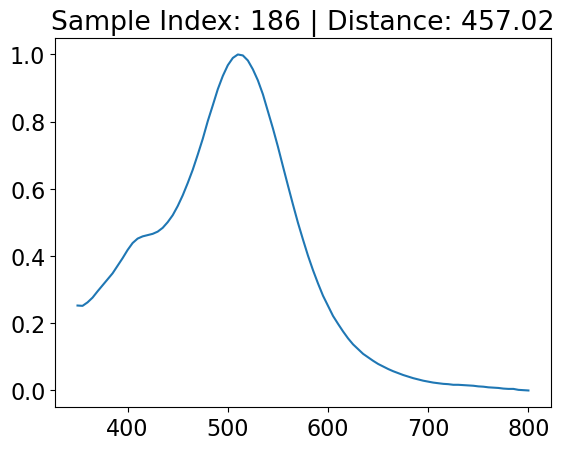

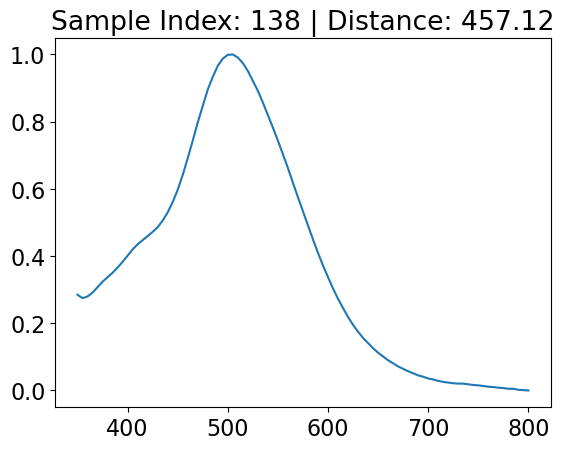

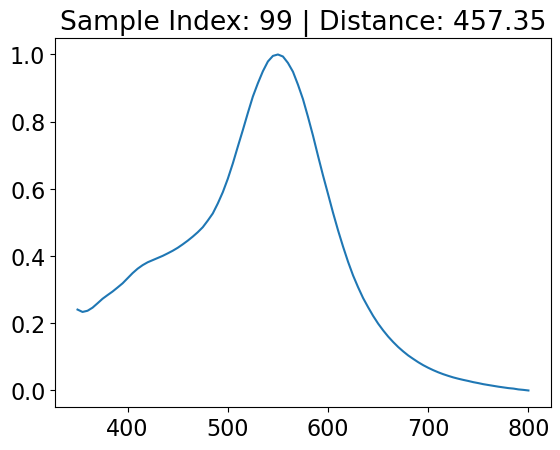

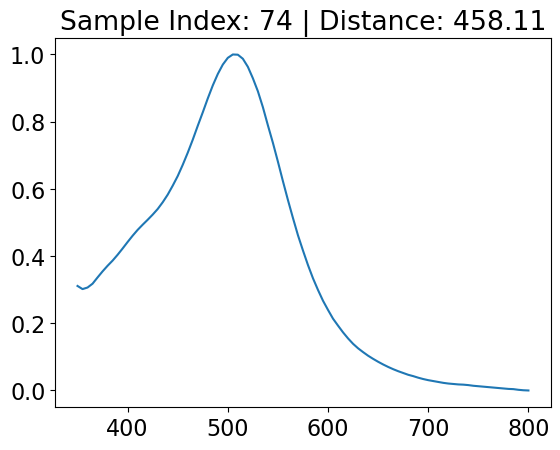

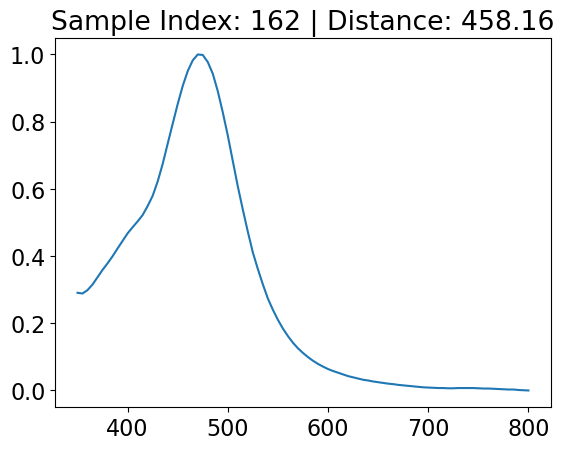

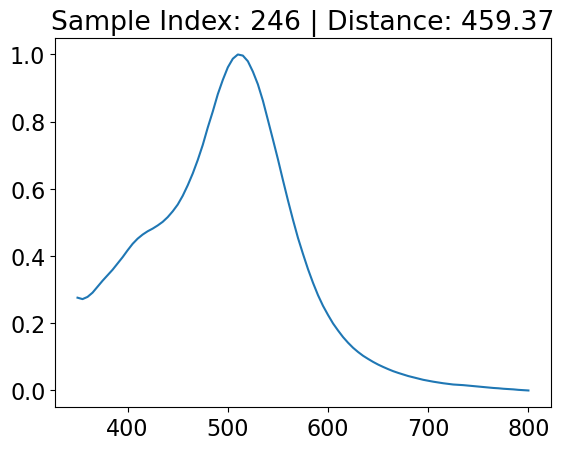

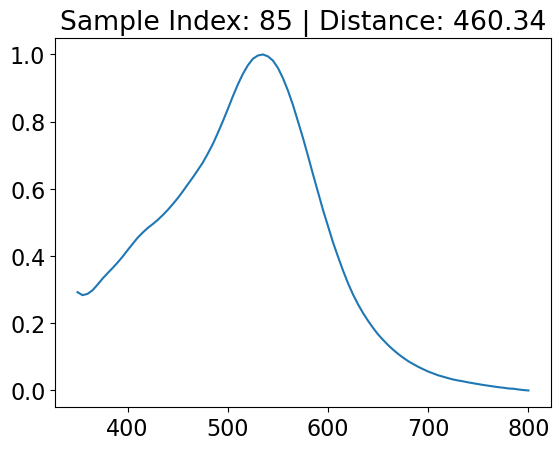

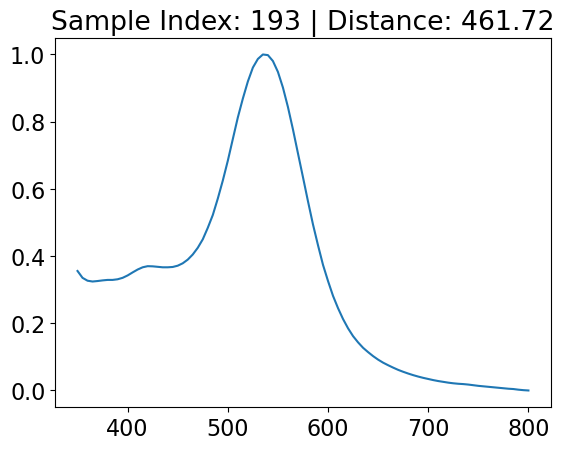

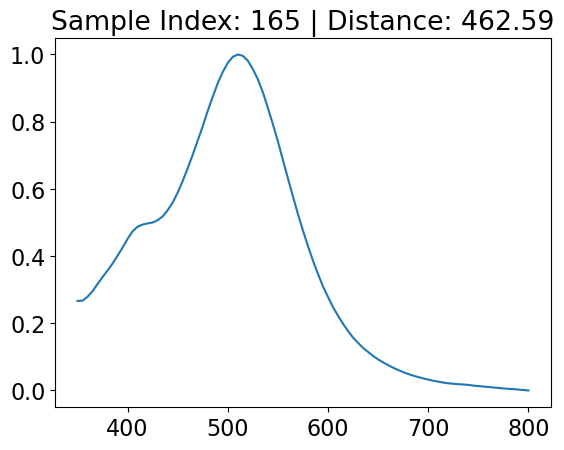

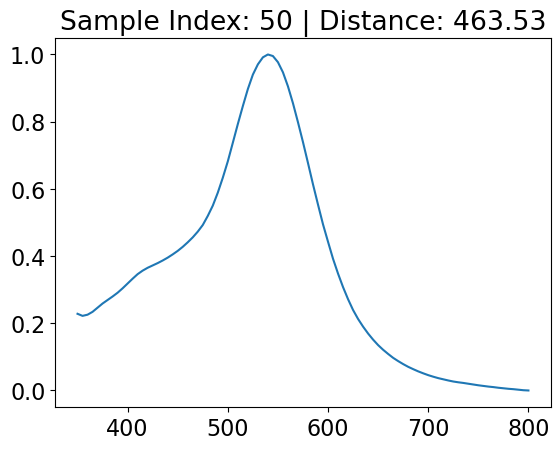

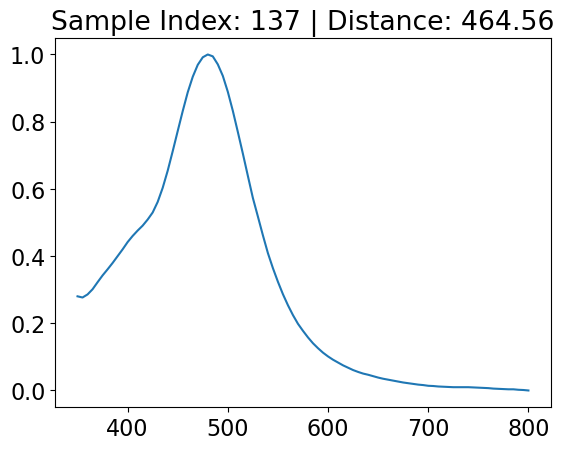

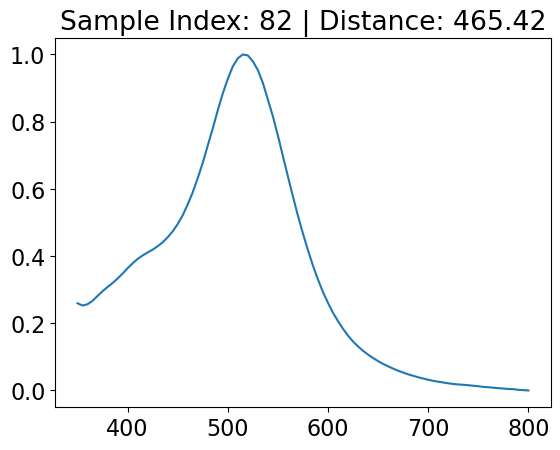

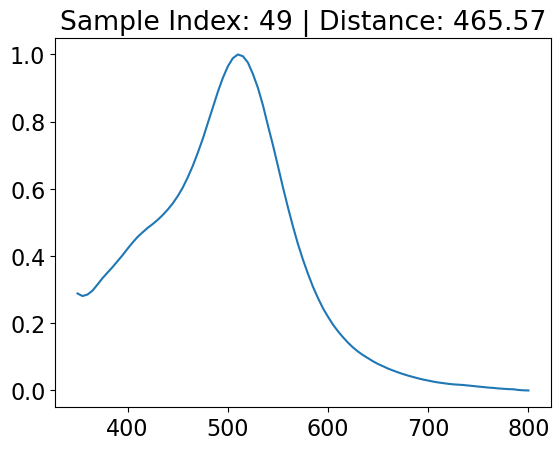

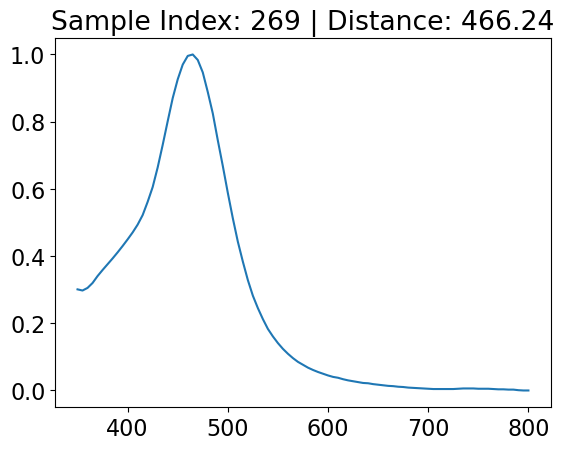

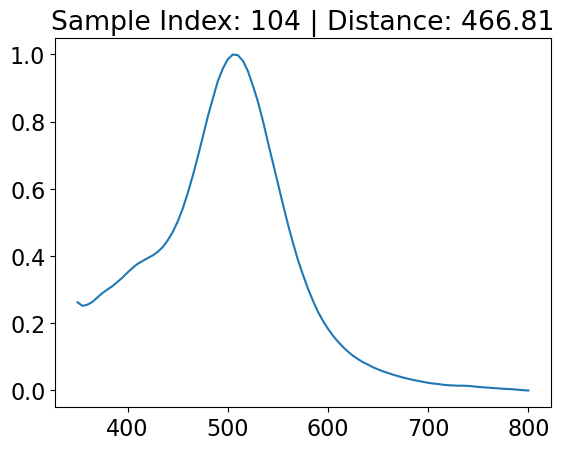

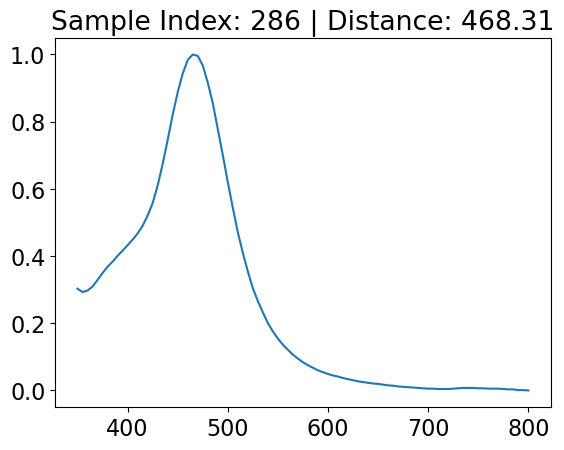

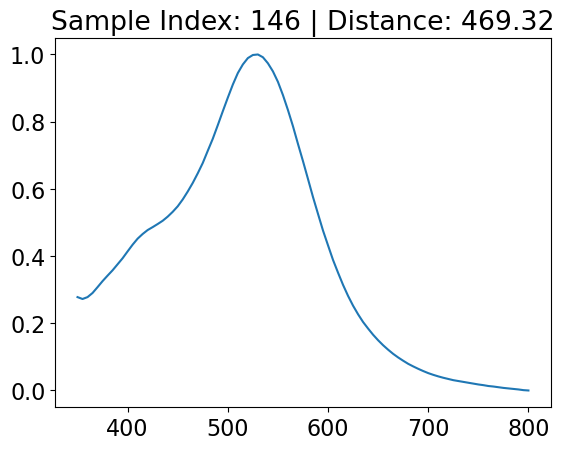

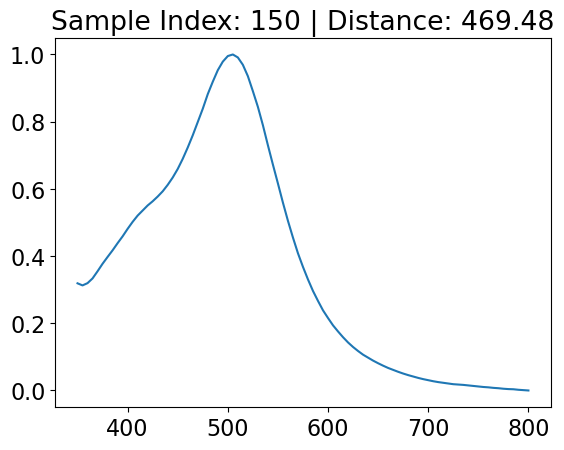

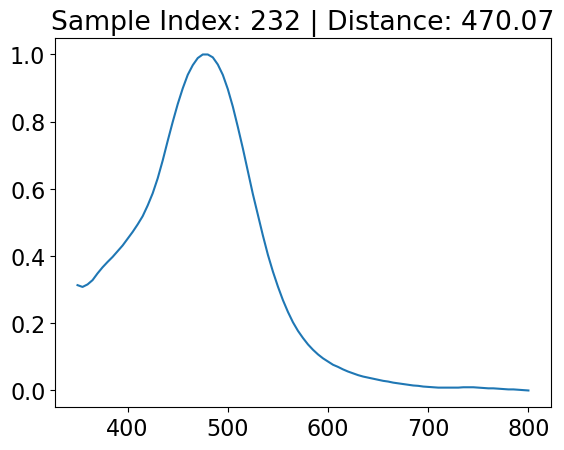

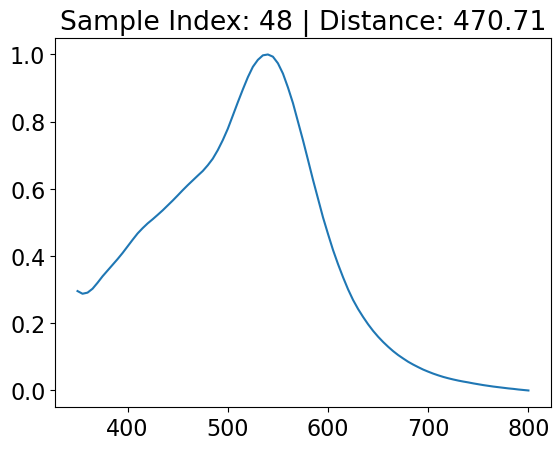

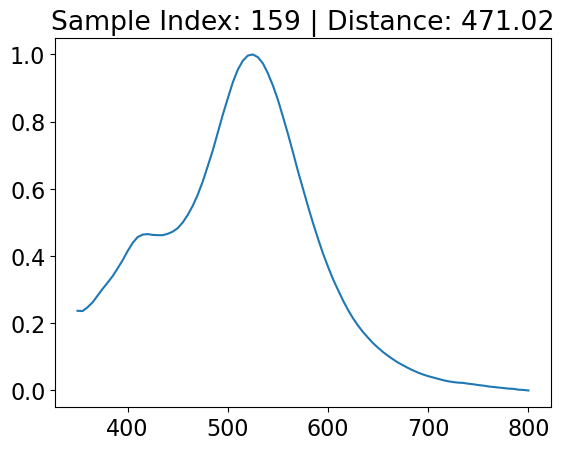

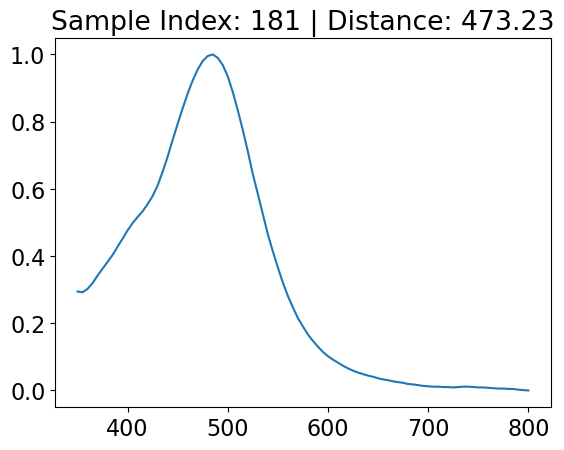

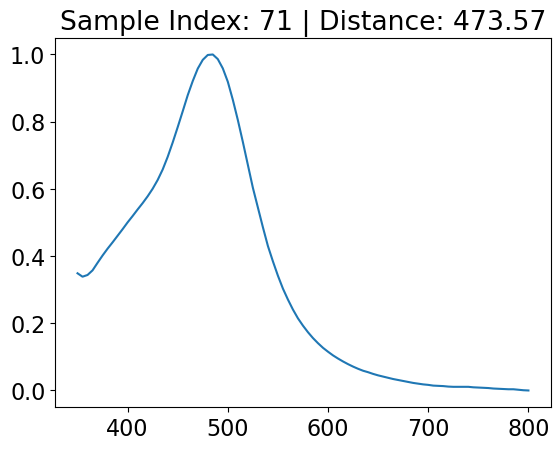

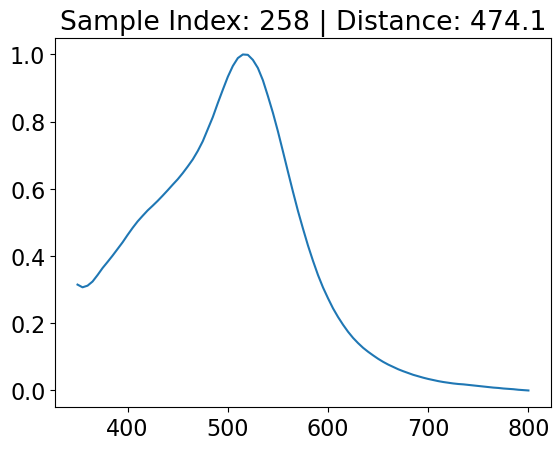

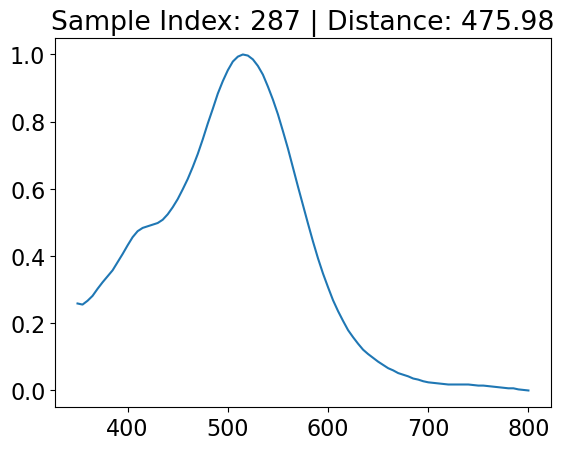

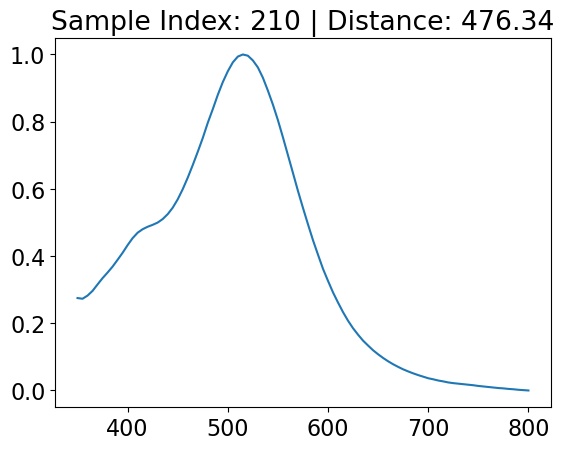

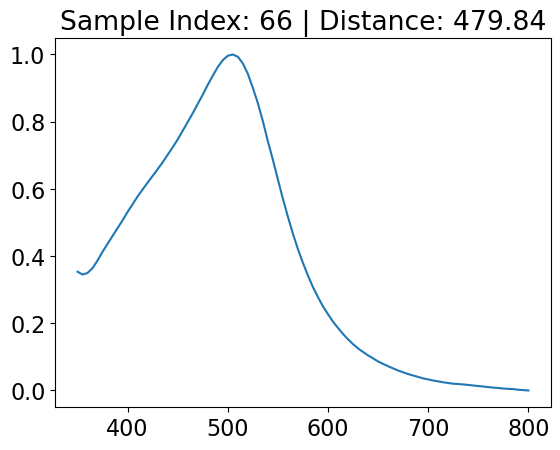

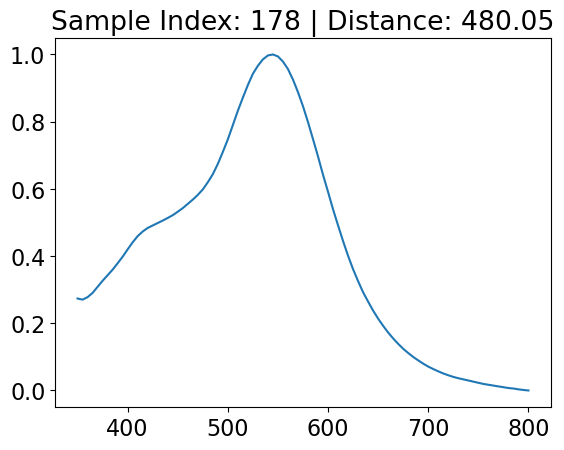

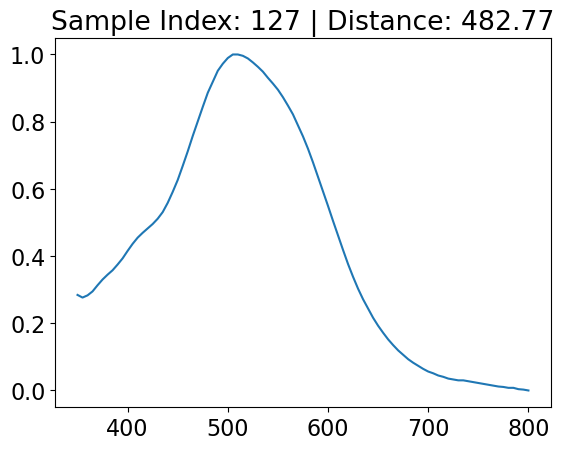

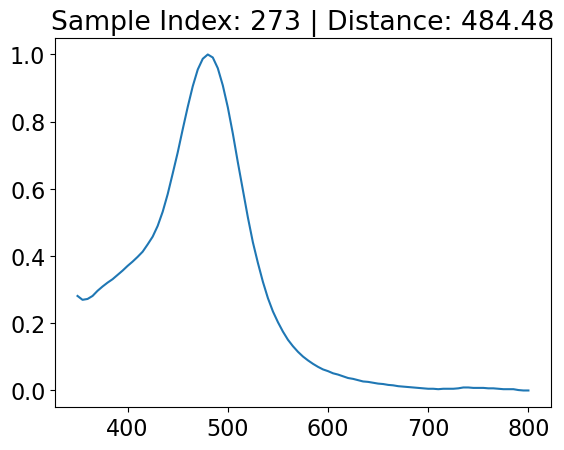

In [43]:
array = np.hstack((hit_loc.reshape(-1,1), distances_all_2[hit_loc].reshape(-1,1)))
array = array[array[:, 1].argsort()]
for i in range(len(array)):
    plt.plot(wv, y[:,int(array[i,0])])
    title_ = 'Sample Index: ' +str(int(array[i,0])) + ' | Distance: ' + str(np.round(array[i,1], 2))
    plt.title(title_)
    plt.show()

In [44]:
classification = np.array([0]*y.shape[1])
classification[hit_loc] = 1

In [46]:
#np.save('classification_5.npy', classification)

## Plotting all the spectra

In [48]:
path_0 = '../Fast Spectroscopic Exploration/Spectra/classification_5.npy'
c = np.load(path_0)

In [49]:
wv = np.linspace(350, 800, 91)

Text(0, 0.5, 'Extinction (A.U)')

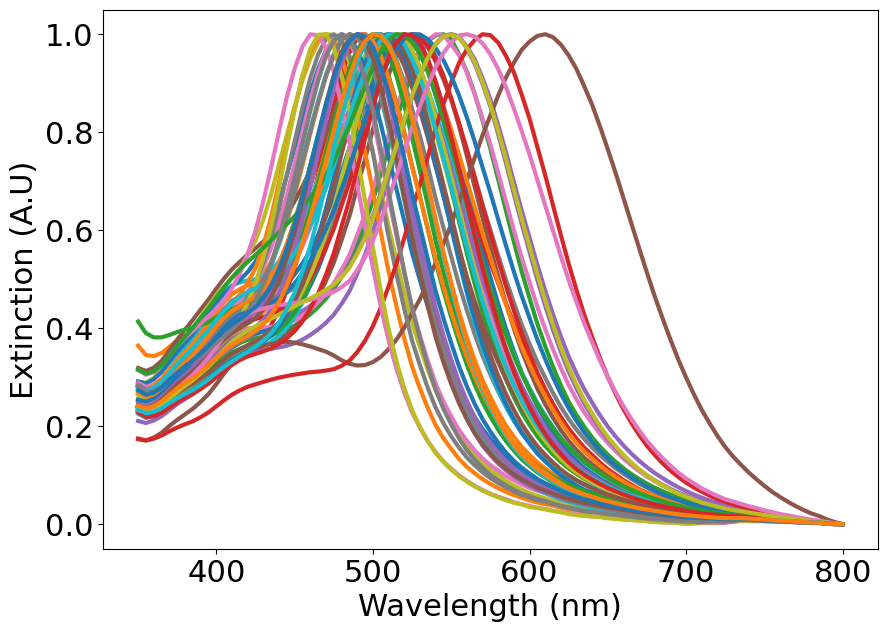

In [50]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(10,7))
for i in range(y.shape[1]):
    if c[i] == 1 and i%3 == 0:
        plt.plot(wv, y[:,i], linewidth=3)
        #calculate_max_wv(y[:,i])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Extinction (A.U)')
#plt.savefig('../Figures/all_spectra_not_plates.png',bbox_inches="tight", dpi = 400)

## Extracting Peak Position

In [13]:
def gaus(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

def calculate_max_wv(spec):
    peak_pos = find_peaks(spec, height=0.75)[0]
    lower = 8
    upper = 8
    scaler = MinMaxScaler()
    coords = spec[int(peak_pos-lower):int(peak_pos+upper)].reshape(-1,1)
    coords = scaler.fit(coords).transform(coords)*100
    new_wv = wv[int(peak_pos-lower):int(peak_pos+upper)]
    
    angles = new_wv - np.median(new_wv)
    data = coords
    angles = np.array(angles).flatten()
    data = np.array(data).flatten()

    n = len(data)  ## <---
    mean = np.sum(data*angles)/n
    sigma = np.sqrt(np.sum(data*(angles-mean)**2)/n)

    popt,pcov = curve_fit(gaus,angles,data)#,p0=[0.18,mean,sigma])  ## <--- leave out the first estimation of the parameters
    xx = np.linspace(np.min(angles), np.max(angles), 100)  ## <--- calculate against a continuous variable

    normal_fit = gaus(xx,*popt)
    xx_wv = xx + np.median(new_wv)
    #plt.plot(xx_wv, normal_fit,'r',label='Fit')  ## <--- plot against the contious variable
    #plt.scatter(new_wv, data)
    peak_position = xx_wv[np.argmax(normal_fit)]
    #plt.title('Peak Position: ' + str(peak_position)[0:3])
    return peak_position

/tmp/ipykernel_156/182506243.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coords = spec[int(peak_pos-lower):int(peak_pos+upper)].reshape(-1,1)
/tmp/ipykernel_156/182506243.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_wv = wv[int(peak_pos-lower):int(peak_pos+upper)]
/tmp/ipykernel_156/182506243.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coords = spec[int(peak_pos-lower):int(peak_pos+upper)].reshape(-1,1)
/tmp/ipykernel_156/182506243.py:11

Text(0, 0.5, 'Extinction (A.U)')

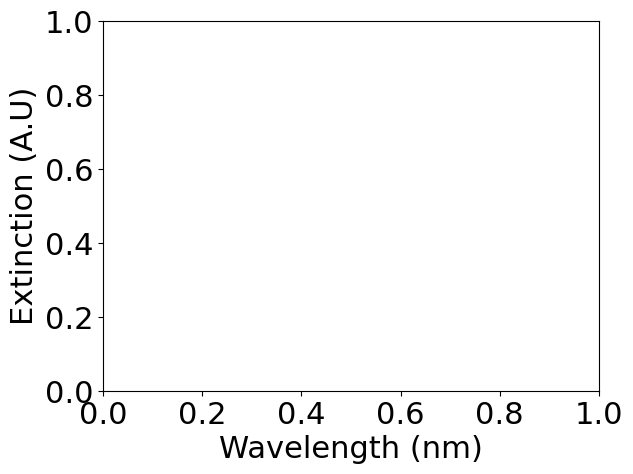

In [28]:
plt.rcParams.update({'font.size': 22})
peak_pos_list = []
for i in range(96, y.shape[1]):
    if c[i] == 1 and i%1 == 0:
        #fig, ax = plt.subplots(figsize=(7,7))
        #plt.plot(wv, y[:,i], linewidth=3)
        peak_position = calculate_max_wv(y[:,i])
        peak_pos_list.append(peak_position)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Extinction (A.U)')
#plt.savefig('../Figures/all_spectra_not_plates.png',bbox_inches="tight", dpi = 400)

In [29]:
pos = np.round(np.array(peak_pos_list))

In [32]:
df = pd.DataFrame(pos, columns=['Peak WV'])

In [35]:
df.to_csv('peak_wv.csv', index=False)